to-dos:
1. correlation between categorical col and the target column (anova?)
2. how do deal with a lot of unknown vals in cat cols
3. how to apply clustering to the num cols 


# Introduction
## Problem framing

We deal with a supervised learning regression problem. It is also univaiate multiple regression problem. We solve it using batch learning.

## Metrics selection

In [52]:

import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

from platform import python_version

print(python_version())
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

3.11.13
1.26.4
2.2.2
1.4.2


In [4]:
from splitter import splitter

X_train, X_test, y_train, y_test = splitter(".//topic21_v9_train.csv")
print()

In [4]:
X_train[X_train['horsepower'].isna()]

0         1          2         3         4          brand  \
3573       NaN  3.618789  19.297796  0.417109  0.537373      Chevrolet   
3217  1.291337  3.729891 -11.834981  0.977601  0.070208        Porsche   
5143  0.524861  3.697177  15.284626  0.472173  1.078732            BMW   
1158  0.569891  3.682927  19.467867  0.419471  2.110999     Mitsubishi   
2498  0.565981  3.623270  15.433341  0.252024 -0.106847           Audi   
...        ...       ...        ...       ...       ...            ...   
7526  0.443171  3.638581  -2.440064  0.283332  0.449441           MINI   
1529       NaN  3.578158  13.709829  0.247944 -0.431892          Lexus   
4191  1.277617  3.690190  12.954748  0.990662 -3.324319  Mercedes-Benz   
7734  1.136287  3.773229 -15.820155  0.615438  2.485309  Mercedes-Benz   
5390       NaN  3.625648  12.157203  0.689505  0.452885           Audi   

              model            trim body_type fuel_type  \
3573        Equinox           Other       SUV    Petrol   
3217  Carrera / 911       Carrera S     Coupe    Petrol   
5143             X5       Xdrive50i       SUV    Petrol   
1158        Montero           Other       SUV    Petrol   
2498             A4          S-line     Sedan    Petrol   
...             ...             ...       ...       ...   
7526         Cooper        Cooper S     Coupe    Petrol   
1529      RX-Series           Other       SUV    Petrol   
4191        E-Class        E 55 AMG     Sedan    Petrol   
7734  S-Class Coupe  S 63 Coupe AMG     Coupe    Petrol   
5390             A5          S-line     Sedan    Petrol   

           transmission_type engine_capacity_cc horsepower exterior_color  \
3573  Automatic Transmission                NaN        NaN          Beige   
3217  Automatic Transmission                NaN        NaN            Red   
5143  Automatic Transmission           4000+ cc        NaN          White   
1158  Automatic Transmission                NaN        NaN          White   
2498  Automatic Transmission                NaN        NaN          White   
...                      ...                ...        ...            ...   
7526  Automatic Transmission                NaN        NaN           Grey   
1529  Automatic Transmission                NaN        NaN          White   
4191  Automatic Transmission                NaN        NaN          Black   
7734  Automatic Transmission           4000+ cc        NaN          White   
5390  Automatic Transmission                NaN        NaN           Blue   

     interior_color        warranty       city seller_type  
3573          Black              No  Abu Dhabi      Dealer  
3217          Beige              No      Dubai      Dealer  
5143          Brown             Yes      Dubai      Dealer  
1158          Beige              No      Dubai      Dealer  
2498          Black             Yes      Dubai      Dealer  
...             ...             ...        ...         ...  
7526        Unknown             Yes      Dubai      Dealer  
1529          Black  Does not apply      Dubai      Dealer  
4191          Black  Does not apply      Dubai      Dealer  
7734            Tan  Does not apply      Dubai      Dealer  
5390          White              No      Dubai      Dealer  

[300 rows x 18 columns]

# Data introduction

In [4]:
X_train.dtypes

0                     float64
1                     float64
2                     float64
3                     float64
4                     float64
brand                  object
model                  object
trim                   object
body_type              object
fuel_type              object
transmission_type      object
engine_capacity_cc     object
horsepower             object
exterior_color         object
interior_color         object
warranty               object
city                   object
seller_type            object
dtype: object

## Duplicates
there are none

In [5]:
# set 'Unknown' to NaN in each column of X_train
X_train = X_train.replace('Unknown', np.nan)

## Categorical data

In [6]:
train_categ = X_train.select_dtypes(include='object').reset_index(drop=True)
train_categ

brand        model           trim  body_type fuel_type  \
0               GMC       Acadia         Denali  Crossover    Petrol   
1            Nissan        Tiida        SL Plus  Hatchback    Petrol   
2            Subaru          WRX        WRX STI      Sedan    Petrol   
3     Mercedes-Benz      C-Class  C200 Elegance      Sedan    Petrol   
4            Suzuki        Jimny         GLX MT        SUV    Petrol   
...             ...          ...            ...        ...       ...   
6364        Porsche      Cayenne            GTS        SUV    Petrol   
6365           Audi           A5         S-line      Sedan    Petrol   
6366     Land Rover  Range Rover        HSE TOP        SUV    Petrol   
6367          Dodge      Charger            SXT      Sedan    Petrol   
6368        Hyundai       Accent             GL      Sedan    Petrol   

           transmission_type engine_capacity_cc    horsepower exterior_color  \
0     Automatic Transmission     3000 - 3499 cc  300 - 399 HP          Black   
1     Automatic Transmission                NaN     0 - 99 HP          White   
2        Manual Transmission     2500 - 2999 cc  700 - 799 HP           Grey   
3     Automatic Transmission     2000 - 2499 cc  200 - 299 HP           Grey   
4        Manual Transmission     1500 - 1999 cc  100 - 199 HP          Black   
...                      ...                ...           ...            ...   
6364  Automatic Transmission     3500 - 3999 cc  400 - 499 HP          Black   
6365  Automatic Transmission                NaN           NaN           Blue   
6366  Automatic Transmission     3500 - 3999 cc  300 - 399 HP          Black   
6367  Automatic Transmission     3500 - 3999 cc  300 - 399 HP           Grey   
6368  Automatic Transmission     1500 - 1999 cc  200 - 299 HP           Grey   

     interior_color        warranty   city seller_type  
0       Other Color              No  Dubai       Owner  
1               NaN              No  Dubai       Owner  
2             Black  Does not apply  Dubai       Owner  
3               NaN             Yes  Dubai       Owner  
4             Black              No  Dubai       Owner  
...             ...             ...    ...         ...  
6364          Black             Yes  Dubai      Dealer  
6365          White              No  Dubai      Dealer  
6366            NaN              No  Dubai       Owner  
6367            NaN  Does not apply  Dubai       Owner  
6368          Beige             Yes  Dubai      Dealer  

[6369 rows x 13 columns]

In [16]:
for col in train_categ.columns:
    print(f"{col} has {train_categ[col].isna().sum()} missing values")

brand has 0 missing values
model has 0 missing values
trim has 8 missing values
body_type has 0 missing values
fuel_type has 0 missing values
transmission_type has 0 missing values
engine_capacity_cc has 1704 missing values
horsepower has 713 missing values
exterior_color has 0 missing values
interior_color has 1280 missing values
warranty has 0 missing values
city has 0 missing values
seller_type has 0 missing values


In [7]:
print(train_categ['horsepower'].isna().sum() + (train_categ['horsepower'] == 'Unknown').sum())

print(train_categ['horsepower'].value_counts())

713
horsepower
200 - 299 HP    1557
300 - 399 HP    1156
100 - 199 HP    1110
400 - 499 HP     717
500 - 599 HP     580
Unknown          413
600 - 699 HP     308
700 - 799 HP     100
0 - 99 HP         54
800 - 899 HP      37
900+ HP           37
Name: count, dtype: int64


In [8]:
print(train_categ['exterior_color'].isna().sum())

print(train_categ['exterior_color'].value_counts())

0
exterior_color
White          2002
Black          1412
Grey            925
Blue            523
Silver          501
Red             355
Brown           141
Gold            110
Green            99
Yellow           60
Beige            57
Burgundy         55
Orange           50
Other Color      49
Purple           19
Tan               8
Teal              3
Name: count, dtype: int64


In [13]:
print(train_categ['interior_color'].isna().sum())

print(train_categ['interior_color'].value_counts())

0
interior_color
Black          2161
Beige          1401
Unknown        1280
Brown           708
Tan             276
White           250
Other Color     199
Blue             55
Green            21
Yellow           18
Name: count, dtype: int64


### Data preprocessing & selecting most frequent features per category

naive filtering:

In [71]:
# list of columns with more than 5 categories
diverce_categ = train_categ.columns[train_categ.nunique() > 20]

# dictionary with the threshold for OneHotEncoder
max_categ = {}

# dict for plotting: col: df
plot_dict = {}


for col in diverce_categ:

    unique = train_categ[col].value_counts().reset_index()

    unique['cumulative_sum'] = unique['count'].cumsum()
    unique['cumulative_percentage'] = unique['cumulative_sum'] / unique['cumulative_sum'].iloc[-1]
    print(unique)

    # threshold to filter the least common features which contribute up to 5% in total
    threshold = unique[unique['cumulative_percentage'] > 0.95].iloc[:, 0].count()

    # save the frequent features to dict
    max_categ[col] = threshold


    # save the df for plotting
    plot_dict[col] = unique.iloc[:, :2]



            brand  count  cumulative_sum  cumulative_percentage
0   Mercedes-Benz    973             973               0.152771
1             BMW    564            1537               0.241325
2          Nissan    463            2000               0.314021
3      Land Rover    437            2437               0.382635
4          Toyota    430            2867               0.450149
..            ...    ...             ...                    ...
80      King Long      1            6365               0.999372
81      SsangYong      1            6366               0.999529
82          Avatr      1            6367               0.999686
83          Exeed      1            6368               0.999843
84         Pagani      1            6369               1.000000

[85 rows x 4 columns]
                 model  count  cumulative_sum  cumulative_percentage
0          Range Rover    179             179               0.028105
1              S-Class    145             324               0.050871
2 

Cumultive distribution of how often each category appears in the train set

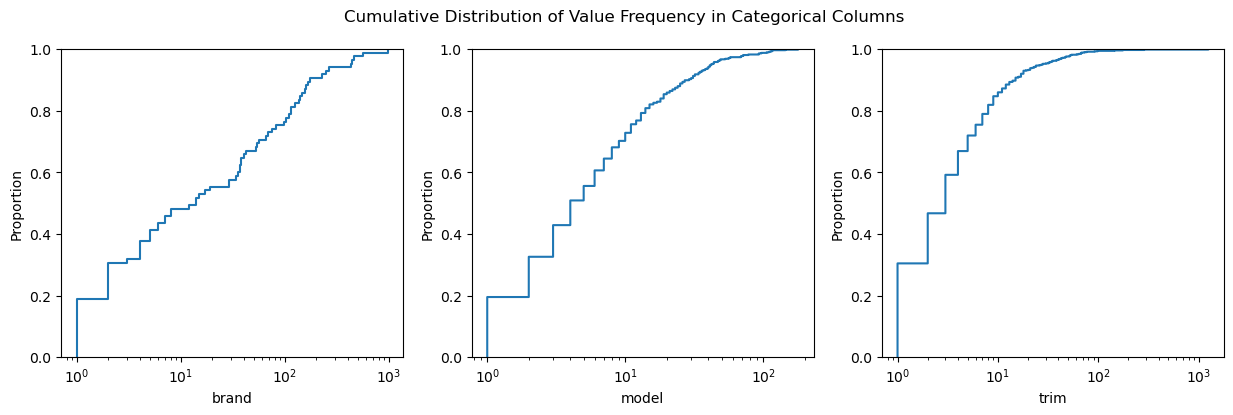

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
# ax = ax.flatten()
# plt.subplots_adjust(wspace=.5, hspace=.5)

# plot the cumulative distributions for each column

for i, (col, df) in enumerate(plot_dict.items()):

    sns.ecdfplot(data=df, x='count', ax=ax[i], log_scale=True)
    ax[i].set_xlabel(col)

fig.suptitle('Cumulative Distribution of Value Frequency in Categorical Columns')
plt.show()

### One Hot Encoding

#### Column Transformer

In [72]:
# Encode as it is
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [74]:
transformers = []

# scaling of numerical features
transformers.append((
    "scale",
    StandardScaler(),
    X_train.select_dtypes(include=np.number).columns.tolist()
))

# add one-hot encoders with custom max_categories
for col, max_cat in max_categ.items():
    encoder = OneHotEncoder(handle_unknown='infrequent_if_exist',
                            max_categories=max_cat,
                            sparse_output=False) #?


    transformers.append((
        f"ohe_{col}",
        encoder,
        [col]
    ))

# add one-hot encoders for the rest of the categorical features
for col in train_categ.columns:
    if col not in max_categ:
        encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        transformers.append((
            f"ohe_{col}",
            encoder,
            [col]
        ))

# combine all in ColumnTransformer
ct = ColumnTransformer(transformers)


In [20]:
ct.fit(X_train)

ColumnTransformer(transformers=[('scale', StandardScaler(),
                                 ['0', '1', '2', '3', '4']),
                                ('ohe_brand',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=51,
                                               sparse_output=False),
                                 ['brand']),
                                ('ohe_model',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=206,
                                               sparse_output=False),
                                 ['model']),
                                ('ohe_trim',
                                 OneHotEncoder(handle_unknown...
                                ('ohe_interior_color',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['interior_color']),
                                ('ohe_warranty',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['warranty']),
                                ('ohe_city',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['city']),
                                ('ohe_seller_type',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['seller_type'])])

# First-ever tries to train a lm
## Ridge

In [25]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer 

In [26]:
pipe = Pipeline([('transform_columns', ct),
                 ('imputer', SimpleImputer()),
                 ('ridge', Ridge())])

param_grid = {'ridge__alpha' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)

In [27]:
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'ridge__alpha': 1}


In [28]:
print("CV R^2 scores:", grid_search.cv_results_['mean_test_score'])
print("standard deviation of CV R^2 scores (over the 5 splits)", grid_search.cv_results_['std_test_score'])

CV R^2 scores: [0.4519068  0.45210269 0.45370483 0.45859938 0.44590578 0.3914333 ]
standard deviation of CV R^2 scores (over the 5 splits) [0.02003123 0.02009095 0.02058229 0.02335119 0.02735448 0.02129434]


## Lasso

In [29]:
from sklearn.linear_model import Lasso

In [31]:
pipe_lasso = Pipeline([('transform_columns', ct),
                 ('imputer', SimpleImputer()),
                 ('lasso', Lasso())])

param_grid_lasso = {'lasso__alpha' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_lasso = GridSearchCV(pipe, param_grid=param_grid, cv=5)

grid_search_lasso.fit(X_train, y_train)

print("CV R^2 scores:", grid_search_lasso.cv_results_['mean_test_score'])
print("standard deviation of CV R^2 scores (over the 5 splits)", grid_search_lasso.cv_results_['std_test_score'])

CV R^2 scores: [0.4519068  0.45210269 0.45370483 0.45859938 0.44590578 0.3914333 ]
standard deviation of CV R^2 scores (over the 5 splits) [0.02003123 0.02009095 0.02058229 0.02335119 0.02735448 0.02129434]


# Feature engineering 

In [7]:
# correlation coefficient between numerical and target variable
corr = X_train.select_dtypes(include=np.number).corrwith(y_train)
print("Correlation coefficients between numerical features and target variable:")
print(corr)

Correlation coefficients between numerical features and target variable:
0   -0.012433
1    0.277723
2   -0.201316
3    0.019822
4    0.050619
dtype: float64


Relationship between Numerical data and the target column

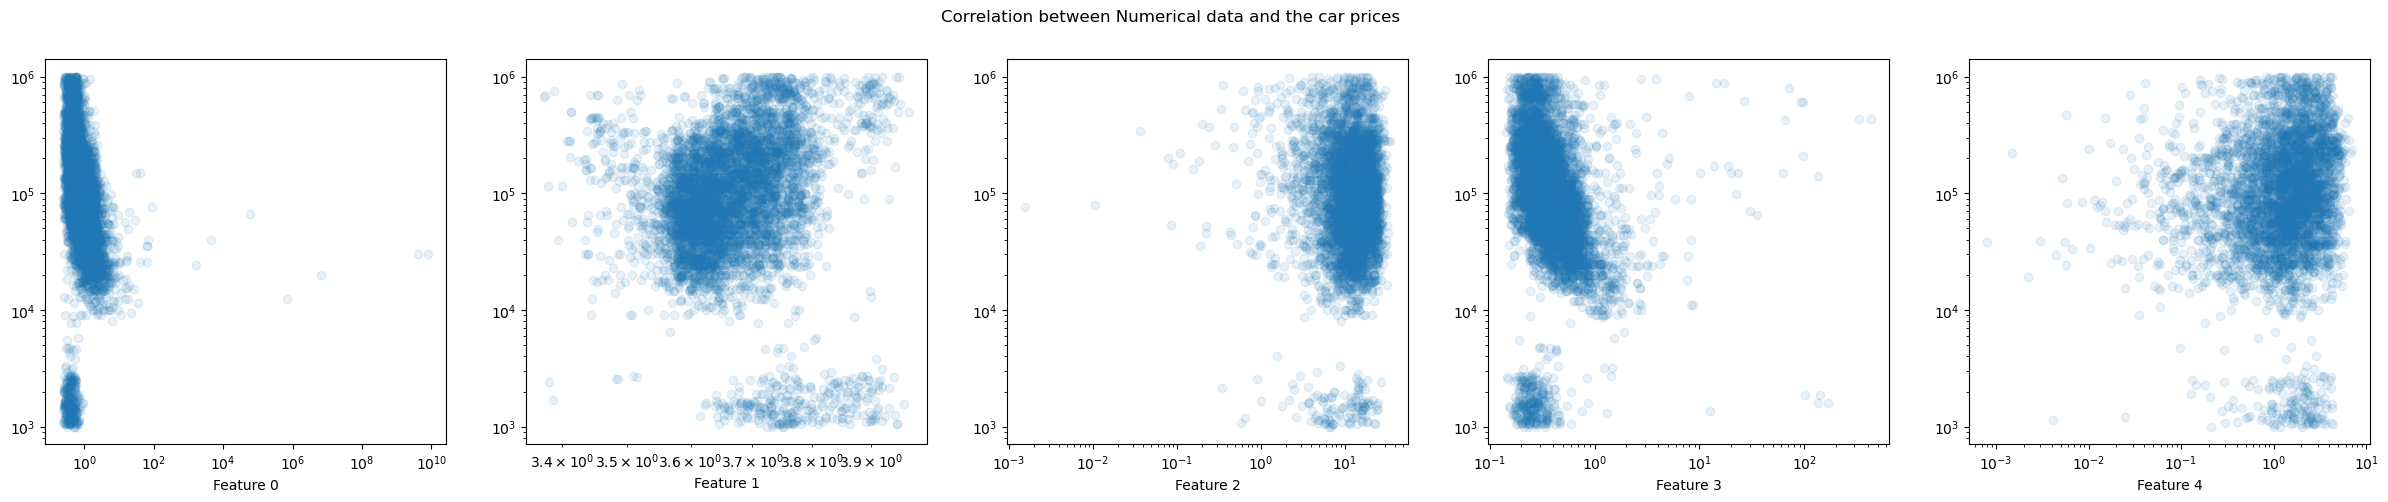

In [8]:
fig, ax = plt.subplots(1, 5, figsize=(30, 5))
# plt.subplots_adjust(wspace=.5, hspace=.5)

# plot the cumulative distributions for each column

for i in range(5):

    ax[i].scatter(x=X_train[f'{i}'], y=y_train, alpha=0.1)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel(f'Feature {i}')

fig.suptitle('Correlation between Numerical data and the car prices')
plt.show()

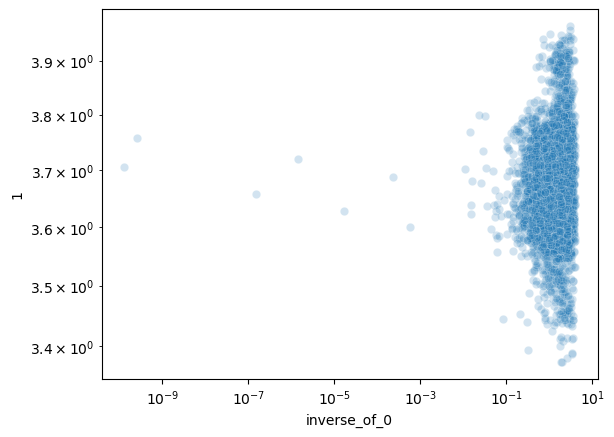

In [ ]:
# add a new column 1/x for the 0 column
X_train['inverse_of_log_0'] = 1 / X_train['0'].replace(0, np.nan)  # replace 0 with NaN to avoid division by zero

# plot numeric features against each other with log scale 

sns.scatterplot(data=X_train, x='inverse_of_0', y='1', alpha=0.2)
plt.xscale('log')
plt.yscale('log')

In [29]:
X_train['2']

2864    13.469804
2722    20.769281
838      9.776158
14      16.046324
3870     6.158044
          ...    
5226    21.208955
5390    12.157203
860           NaN
7603     9.862214
7270    11.020759
Name: 2, Length: 6369, dtype: float64

<Axes: xlabel='1', ylabel='2'>

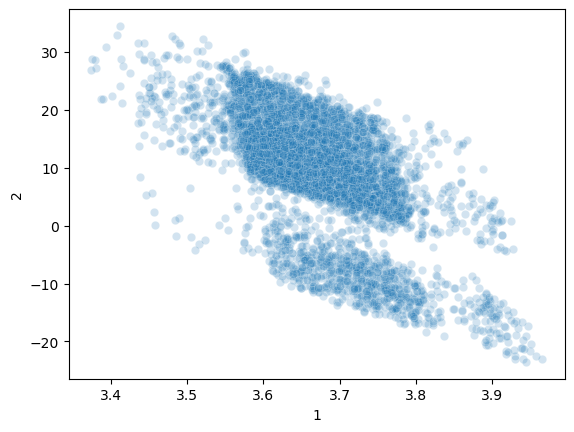

In [28]:
sns.scatterplot(data=X_train, x='1', y='2', alpha=0.2)


<Axes: xlabel='1', ylabel='4'>

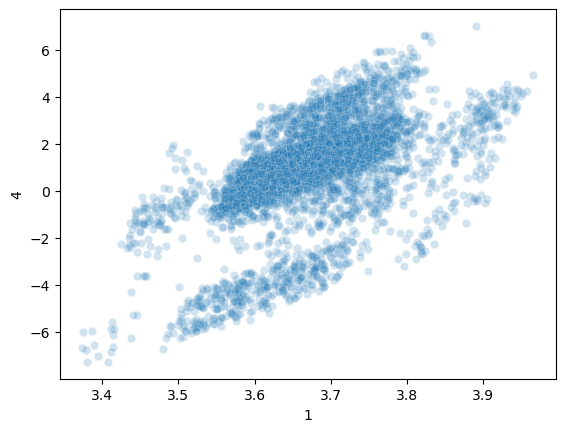

In [27]:
sns.scatterplot(data=X_train, x='1', y='4', alpha=0.2)

<Axes: xlabel='2', ylabel='4'>

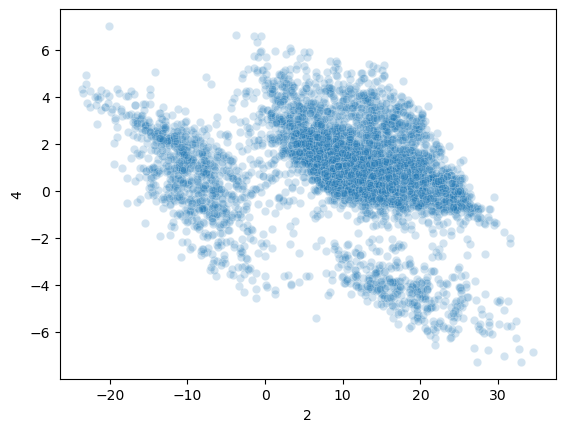

In [26]:
sns.scatterplot(data=X_train, x='2', y='4', alpha=0.2)

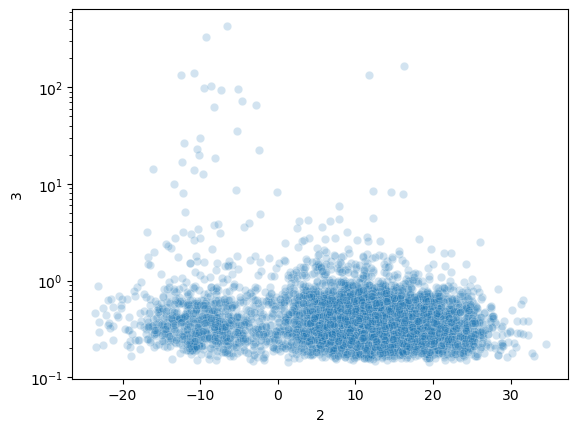

In [14]:
sns.scatterplot(data=X_train, x='2', y='3', alpha=0.2)
plt.yscale('log')

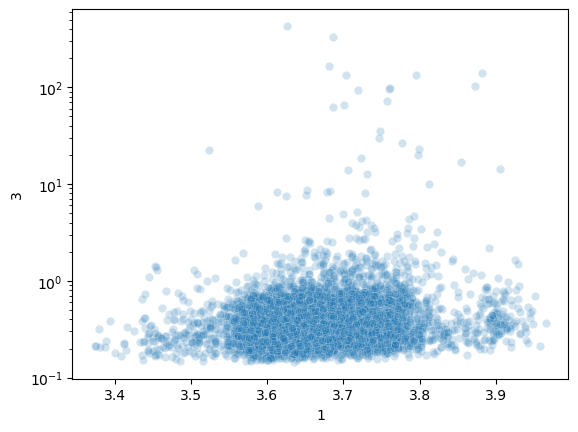

In [13]:
sns.scatterplot(data=X_train, x='1', y='3', alpha=0.2)
plt.yscale('log')

AttributeError: 'Axes3D' object has no attribute 'logscale'

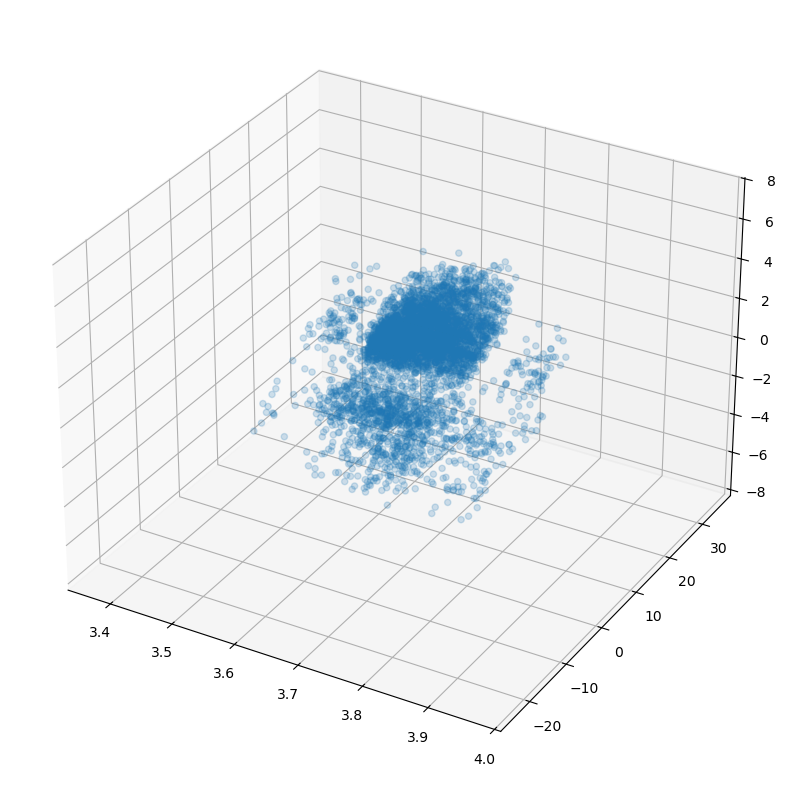

In [ ]:
# plot 1, 2, 4 in 3D
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['1'], X_train['2'], X_train['4'], alpha=0.2)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 4')
plt.show()

C:\Users\dir\AppData\Local\Temp\ipykernel_20580\3416820118.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 10)
C:\Users\dir\AppData\Local\Temp\ipykernel_20580\3416820118.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100)


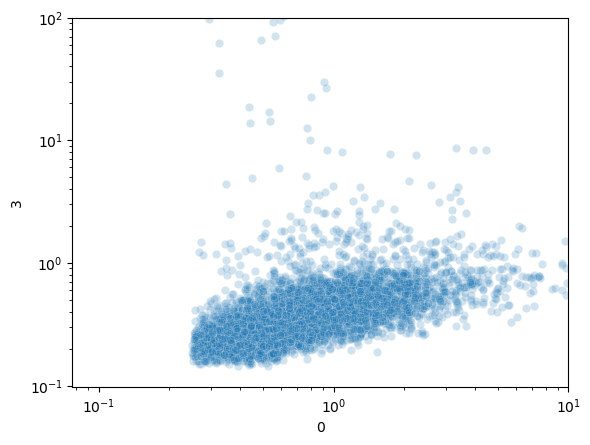

In [21]:
sns.scatterplot(data=X_train, x='0', y='3', alpha=0.2)
plt.xscale('log')
plt.yscale('log')

# set limitations for the axes
plt.xlim(0, 10)
plt.ylim(0, 100) 

plt.show()

Relationship between Cathegorical data and the Target column

## Clustering

1. PCA to detect multicollinearity
2. deal with outliers (try: Winsorization, IsolationForest  or Z-score thresholding)
3. scale the data


### 1.  Multicollinearity
1 vs 2 vs 4 (1 is the imposter)

In [20]:
num_train = X_train.select_dtypes(include=np.number)

Number of NaN values in numerical features:
0    556
1    355
2    653
3    378
4    380
dtype: int64
Percentage of NaN values in numerical features:
0     8.729785
1     5.573873
2    10.252787
3     5.934998
4     5.966400
dtype: float64


!!! Starting from here everything must be transformed into a pipe

#### Detect outliers with Isolation Forest

In [32]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer # for the isolation forest

# temporarry impute missing values in numerical features before applying Isolation Forest
imputer = SimpleImputer(strategy='median')  # median is robust to outliers
num_temp = imputer.fit_transform(num_train)

iforest = IsolationForest(#contamination = 0.03, 
                          random_state=42)

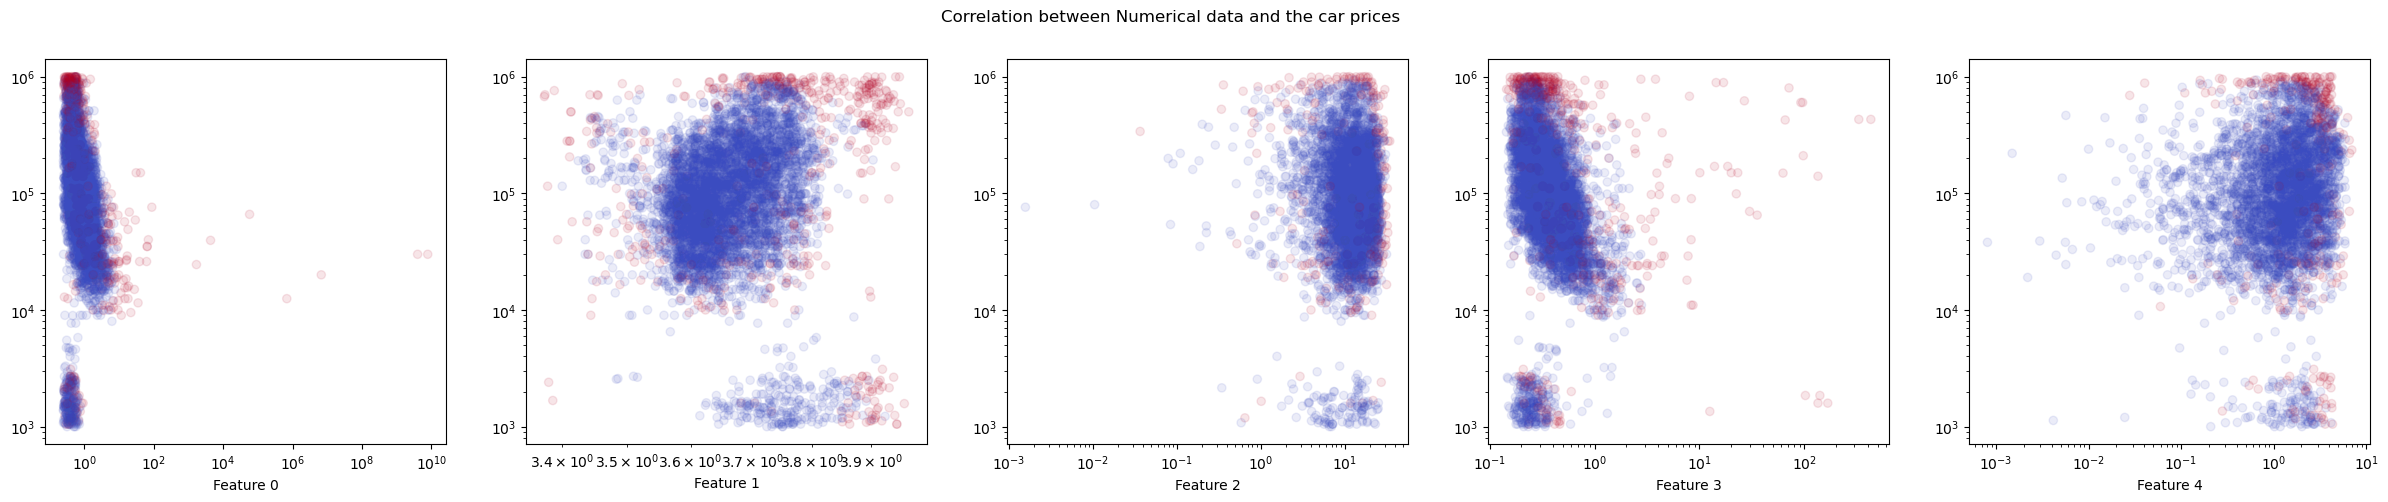

In [33]:
# testing iforest on the whole train set to see the distribution of outliers
iforest.fit(num_temp)
num_train['outliers'] = iforest.predict(num_temp) == -1

fig, ax = plt.subplots(1, 5, figsize=(30, 5))

for i in range(5):

    ax[i].scatter(x=num_train[f'{i}'], y=num_train['price'], alpha=0.1, c=num_train['outliers'], cmap='coolwarm')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel(f'Feature {i}')

fig.suptitle('Correlation between Numerical data and the car prices')
plt.show()

In [34]:
print('Outliers detected in total:', num_train['outliers'].sum())
print('Ratio of the outliers to the total number of observations:')
print(num_train['outliers'].sum() / len(num_train))

Outliers detected in total: 560
Ratio of the outliers to the total number of observations:
0.08792589103469932


In [35]:
~num_train['outliers']

2864    True
2722    True
838     True
14      True
3870    True
        ... 
5226    True
5390    True
860     True
7603    True
7270    True
Name: outliers, Length: 6369, dtype: bool

In [37]:
# drop outliers from the training set
num_train = num_train[~num_train['outliers']]

# drop the outliers column
num_filtered = num_train.drop(columns=['outliers'])

In [30]:
num_train

0         1          2         3         4   price  outliers
2864  0.933387  3.736676  13.469804  0.436338       NaN   85000     False
2722  1.046102  3.577125  20.769281  0.422639 -3.927213   35000     False
838   1.046956  3.587600   9.776158  0.368441       NaN  176000     False
14         NaN  3.614859  16.046324  0.190880 -0.684680  232000     False
3870  1.375672  3.594565   6.158044  0.286728 -0.977250   71990     False
...        ...       ...        ...       ...       ...     ...       ...
5226  0.587089  3.654790  21.208955       NaN  0.038555  439000     False
5390       NaN  3.625648  12.157203  0.689505  0.452885   44900     False
860   1.112624  3.720506        NaN  0.665631       NaN   45000     False
7603       NaN       NaN   9.862214  0.653973  1.611732   25000     False
7270  0.807788  3.620538  11.020759  0.257186  0.655248   42500     False

[6369 rows x 7 columns]

In [37]:
# log column 2
X_train["2_log"] = X_train["2"].apply(np.log)

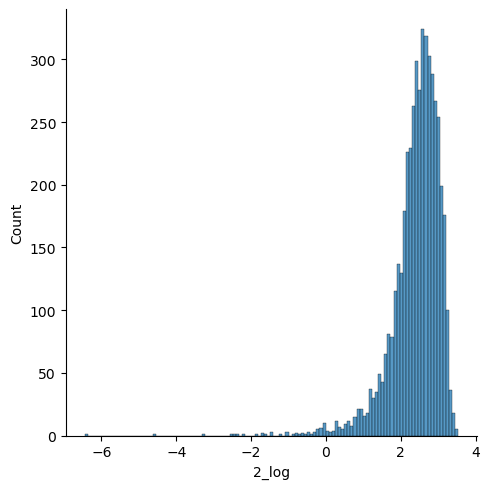

In [ ]:
sns.displot(X_train["2_log"])

In [47]:
from sklearn.preprocessing import StandardScaler

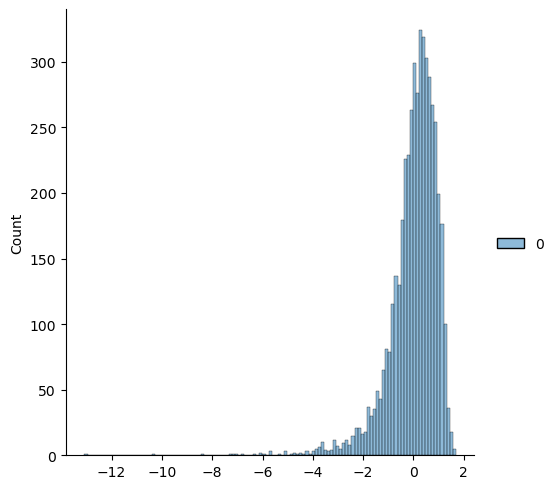

In [48]:
# Fill NaN values in "2_log" with the median before normalization
log2_filled = X_train["2_log"].dropna()
scaled = StandardScaler().fit_transform(log2_filled.values.reshape(-1, 1))
sns.displot(scaled)

#### Clip outliers

Proportion of the dropped values in numerical features:
7.942115455068823


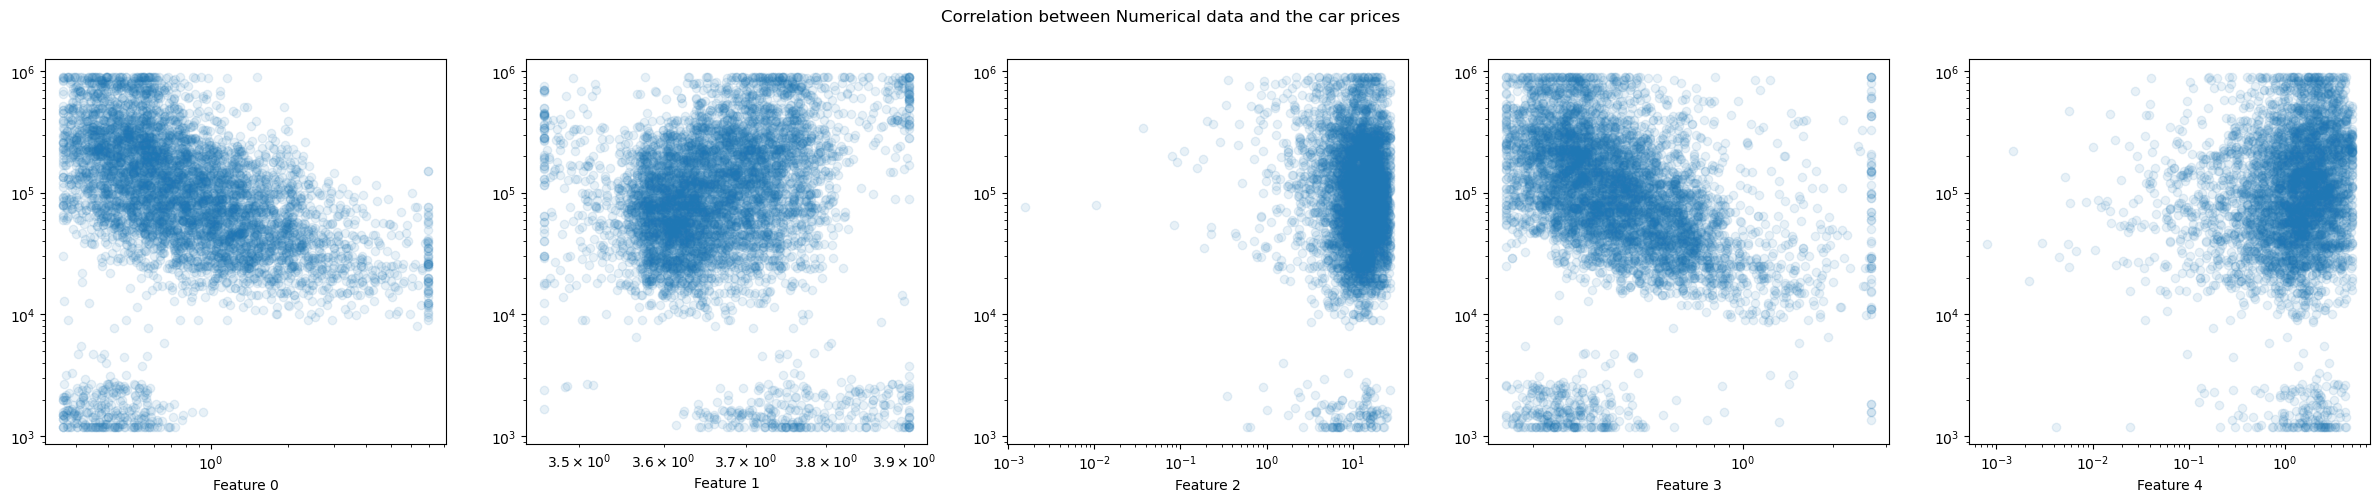

In [21]:
num_cleaned = num_train.clip(lower=num_train.quantile(0.01), upper=num_train.quantile(0.99), axis=1)

# proportion of the dropped values that were outside of the 1% and 99% quantiles
print("Proportion of the dropped values in numerical features:")
print(((num_train != num_cleaned).sum() / num_train.shape[0]).mean() * 100)


# plot the cleaned numerical features
fig, ax = plt.subplots(1, 5, figsize=(30, 5))

for i in range(5):

    ax[i].scatter(x=num_cleaned[f'{i}'], y=num_cleaned.iloc[:, -1], alpha=0.1)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel(f'Feature {i}')

fig.suptitle('Correlation between Numerical data and the car prices')
plt.show()

#### Fill in NaN

In [38]:
# nan in numerical features and its percentage
print("Number of NaN values in numerical features:")
print(num_filtered.isna().sum())
print("Percentage of NaN values in numerical features:")
print(num_filtered.isna().mean() * 100)


Number of NaN values in numerical features:
0        525
1        338
2        621
3        354
4        357
price      0
dtype: int64
Percentage of NaN values in numerical features:
0         9.037700
1         5.818557
2        10.690308
3         6.093992
4         6.145636
price     0.000000
dtype: float64


In [ ]:
from sklearn.experimental import enable_iterative_imputer  # needed to enable
from sklearn.impute import IterativeImputer # for the actual model
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)
imputed = imputer.fit_transform(num_filtered)


KeyboardInterrupt: 

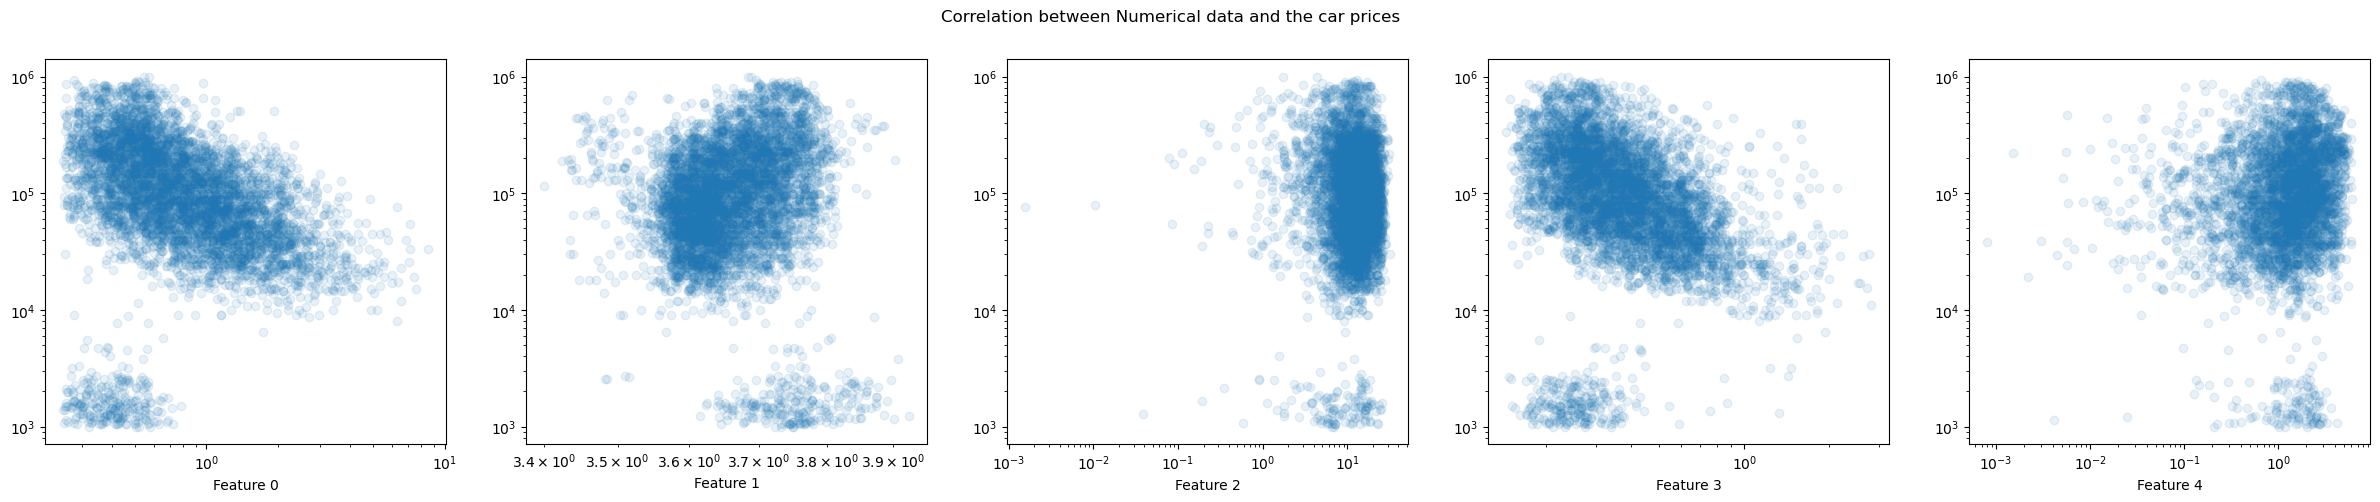

In [ ]:
num_imputed = pd.DataFrame(imputed, columns=num_filtered.columns)

fig, ax = plt.subplots(1, 5, figsize=(30, 5))

for i in range(5):

    ax[i].scatter(x=num_imputed[f'{i}'], y=num_imputed['price'], alpha=0.1)
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel(f'Feature {i}')

fig.suptitle('Correlation between Numerical data and the car prices')
plt.show()

Covariance matrix before data cleaning

<Axes: >

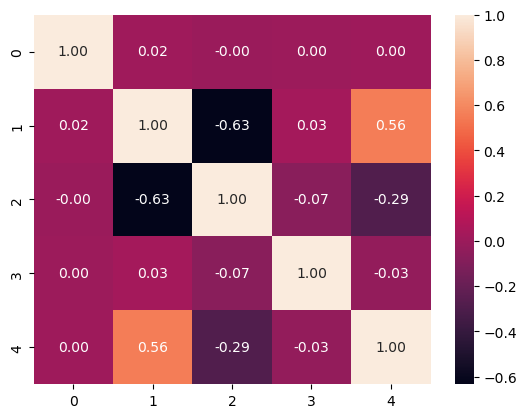

In [ ]:
sns.heatmap(X_train.select_dtypes(include=np.number).dropna().corr(), annot=True, fmt=".2f")

Covariance matrix after data cleaning

<Axes: >

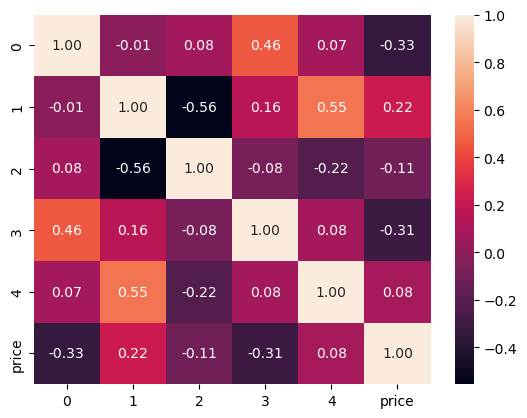

In [44]:
sns.heatmap(num_imputed.corr(), annot=True, fmt=".2f")

#### PCA for dimencion reduction and eliminating multicollinearity

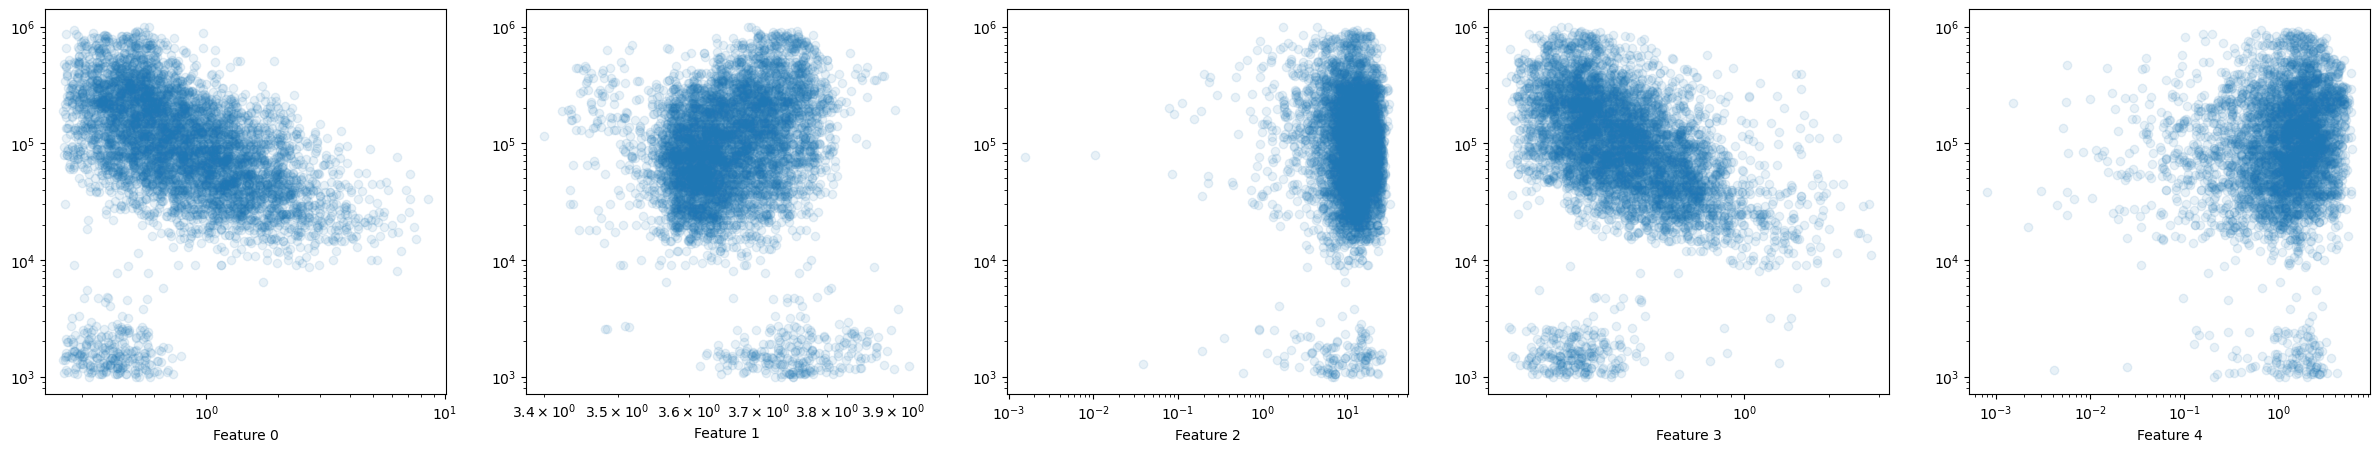

In [64]:
# Standardize numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_scaled = scaler.fit_transform(num_imputed)

num_scaled = pd.DataFrame(num_scaled, columns=num_imputed.columns)


fig, ax = plt.subplots(1, 5, figsize=(30, 5))

for i in range(5):

    ax[i].scatter(x=num_imputed[f'{i}'], y=num_imputed['price'], alpha=0.1)
    ax[i].set_xlabel(f'Feature {i}')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')

In [48]:
num_scaled

0         1         2         3         4     price
0    -0.048516  1.063269  0.388709  0.056008  0.814460 -0.394238
1     0.097559 -1.207023  1.219867  0.001896 -2.641665 -0.726888
2     0.098667 -1.057981 -0.031869 -0.212191 -0.959164  0.211185
3    -0.702147 -0.670099  0.682086 -0.913575 -0.859752  0.583753
4     0.524671 -0.958863 -0.443847 -0.534967 -1.020532 -0.480794
...        ...       ...       ...       ...       ...       ...
5804 -0.497306 -0.101914  1.269931 -0.626320 -0.462302  1.960924
5805  0.275510 -0.516584  0.239250  1.056044 -0.234610 -0.661024
5806  0.183770  0.833181 -0.335357  0.961740  1.093631 -0.660358
5807  1.614347  0.169313 -0.022070  0.915692  0.402228 -0.793418
5808 -0.211287 -0.589285  0.109848 -0.651660 -0.123402 -0.676991

[5809 rows x 6 columns]

In [53]:
from sklearn.decomposition import PCA

num_scaled = num_scaled.drop(columns=['price'])

pca = PCA(n_components=4)
num_reduced = pca.fit_transform(num_scaled)

num_reduced = pd.DataFrame(num_reduced, columns=[f'PC{i+1}' for i in range(4)])

print("Explained variance ratio by each component:")
print(pca.explained_variance_ratio_)
print("Total explained variance ratio by the first 4 components:")
print(pca.explained_variance_ratio_.sum())

Explained variance ratio by each component:
[0.38833368 0.28741272 0.15886509 0.10266089]
Total explained variance ratio by the first 4 components:
0.9372723779171411


### K-Means Clustering
1. After PCA

KeyError: '0'

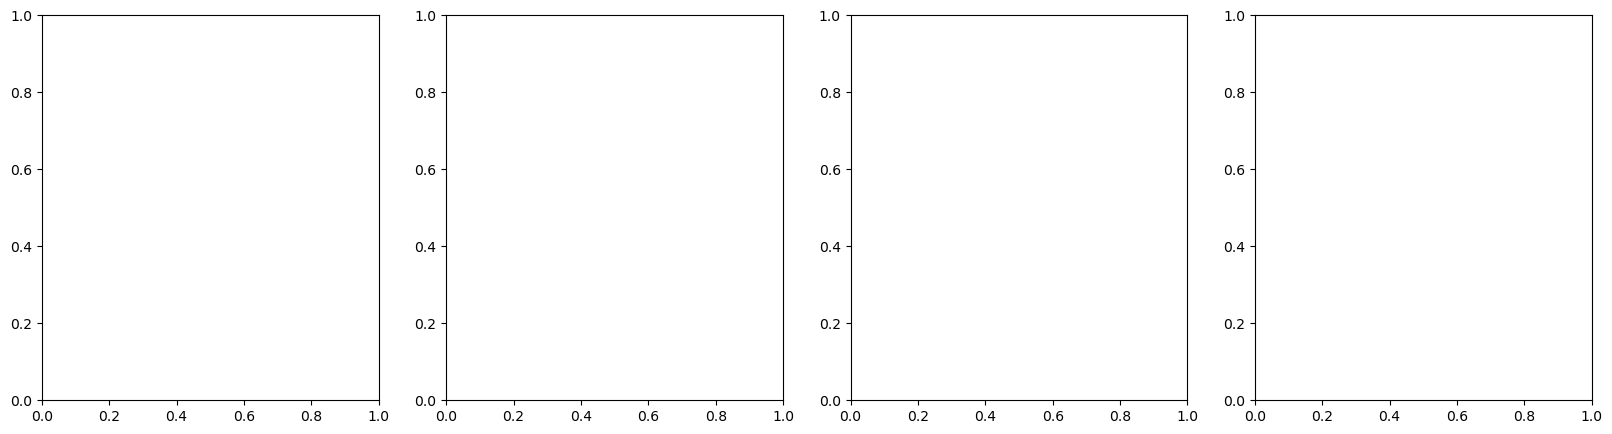

In [ ]:
# normalize the data as a prerequisite for k-means clustering
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

normalizer = Normalizer()
num_normalized = normalizer.fit_transform(num_reduced)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(num_normalized)

num_reduced['cluster'] = kmeans.labels_

In [55]:
num_reduced

PC1       PC2       PC3       PC4  cluster
0     0.911049 -0.101698 -0.814449  0.324062        0
1    -2.744088  0.647144  1.124820  0.069575        1
2    -1.195642  0.122797  0.644823 -0.353359        1
3    -1.509637 -0.802260  0.013118 -0.004197        1
4    -0.988341  0.115107  0.811903 -0.984130        1
...        ...       ...       ...       ...      ...
5804 -1.149555 -0.438546 -0.587545  0.302245        1
5805 -0.290913  1.017650  0.284773  0.530441        1
5806  1.516643  0.506290 -0.330860  0.526394        0
5807  0.713741  1.695321 -0.195016 -0.461863        0
5808 -0.673656 -0.459338 -0.135623 -0.295556        1

[5809 rows x 5 columns]

In [57]:
num_scaled

0         1         2         3         4
0    -0.048516  1.063269  0.388709  0.056008  0.814460
1     0.097559 -1.207023  1.219867  0.001896 -2.641665
2     0.098667 -1.057981 -0.031869 -0.212191 -0.959164
3    -0.702147 -0.670099  0.682086 -0.913575 -0.859752
4     0.524671 -0.958863 -0.443847 -0.534967 -1.020532
...        ...       ...       ...       ...       ...
5804 -0.497306 -0.101914  1.269931 -0.626320 -0.462302
5805  0.275510 -0.516584  0.239250  1.056044 -0.234610
5806  0.183770  0.833181 -0.335357  0.961740  1.093631
5807  1.614347  0.169313 -0.022070  0.915692  0.402228
5808 -0.211287 -0.589285  0.109848 -0.651660 -0.123402

[5809 rows x 5 columns]

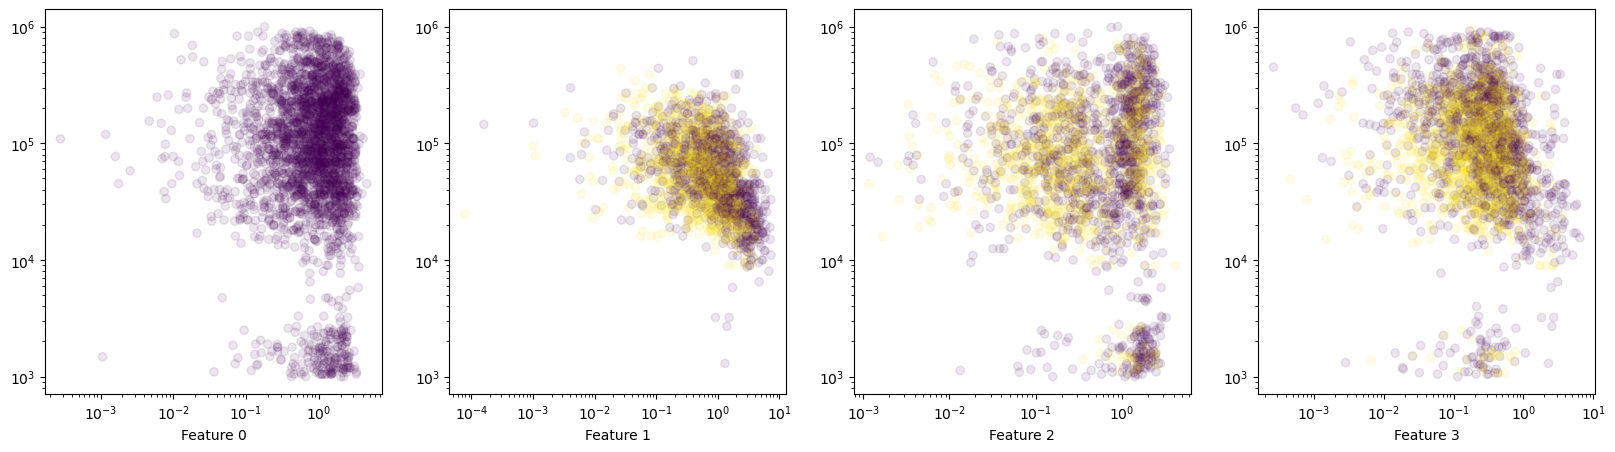

In [60]:

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i in range(4):
    ax[i].scatter(x=num_reduced[f'PC{i+1}'], y=num_imputed['price'], alpha=0.1, c=num_reduced['cluster'], cmap='viridis')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel(f'Feature {i}')

2. Without PCA

In [66]:
normalizer_2 = Normalizer()
num_normalized_2 = normalizer_2.fit_transform(num_scaled.drop(columns=['price']))

# Apply k-means clustering
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(num_normalized_2)

# Convert to DataFrame and add cluster labels
num_normalized_2_df = pd.DataFrame(num_normalized_2, columns=num_scaled.drop(columns=['price']).columns)
num_normalized_2_df['cluster'] = kmeans_2.labels_

In [67]:
num_normalized_2_df

0         1         2         3         4  cluster
0    -0.034739  0.761331  0.278327  0.040104  0.583176        0
1     0.030955 -0.382981  0.387057  0.000602 -0.838185        1
2     0.068166 -0.730930 -0.022017 -0.146597 -0.662660        1
3    -0.406669 -0.388108  0.395050 -0.529124 -0.497951        1
4     0.318165 -0.581463 -0.269153 -0.324409 -0.618860        1
...        ...       ...       ...       ...       ...      ...
5804 -0.316018 -0.064762  0.806989 -0.398000 -0.293774        1
5805  0.219862 -0.412243  0.190925  0.842741 -0.187223        1
5806  0.106789  0.484162 -0.194876  0.558868  0.635510        0
5807  0.846666  0.088798 -0.011575  0.480247  0.210954        0
5808 -0.230006 -0.641492  0.119580 -0.709394 -0.134335        1

[5809 rows x 6 columns]

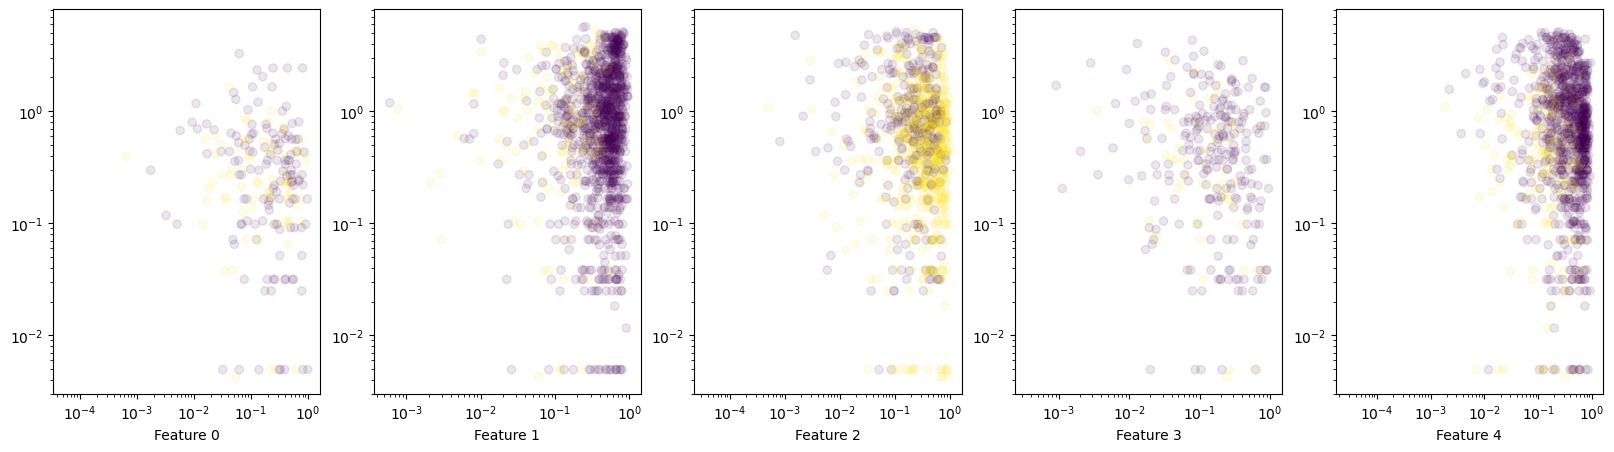

In [69]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

for i in range(5):
    ax[i].scatter(x=num_normalized_2_df[f'{i}'], y=num_scaled['price'], alpha=0.1, c=num_reduced['cluster'], cmap='viridis')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_xlabel(f'Feature {i}')

The numerical column on their own are not enough to detect clusters, since they become visible in the preice range. Hence, we search for the additional featureas that could indicate the price range of an instance. 


### Exploring the correlations between the categorical columns and price

#### Point-biserial correlation (finishhhhh!!!!)

In [70]:
X_train

0         1          2         3         4          brand  \
2864  0.933387  3.736676  13.469804  0.436338       NaN            GMC   
2722  1.046102  3.577125  20.769281  0.422639 -3.927213         Nissan   
838   1.046956  3.587600   9.776158  0.368441       NaN         Subaru   
14         NaN  3.614859  16.046324  0.190880 -0.684680  Mercedes-Benz   
3870  1.375672  3.594565   6.158044  0.286728 -0.977250         Suzuki   
...        ...       ...        ...       ...       ...            ...   
5226  0.587089  3.654790  21.208955       NaN  0.038555        Porsche   
5390       NaN  3.625648  12.157203  0.689505  0.452885           Audi   
860   1.112624  3.720506        NaN  0.665631       NaN     Land Rover   
7603       NaN       NaN   9.862214  0.653973  1.611732          Dodge   
7270  0.807788  3.620538  11.020759  0.257186  0.655248        Hyundai   

            model           trim  body_type fuel_type       transmission_type  \
2864       Acadia         Denali  Crossover    Petrol  Automatic Transmission   
2722        Tiida        SL Plus  Hatchback    Petrol  Automatic Transmission   
838           WRX        WRX STI      Sedan    Petrol     Manual Transmission   
14        C-Class  C200 Elegance      Sedan    Petrol  Automatic Transmission   
3870        Jimny         GLX MT        SUV    Petrol     Manual Transmission   
...           ...            ...        ...       ...                     ...   
5226      Cayenne            GTS        SUV    Petrol  Automatic Transmission   
5390           A5         S-line      Sedan    Petrol  Automatic Transmission   
860   Range Rover        HSE TOP        SUV    Petrol  Automatic Transmission   
7603      Charger            SXT      Sedan    Petrol  Automatic Transmission   
7270       Accent             GL      Sedan    Petrol  Automatic Transmission   

     engine_capacity_cc    horsepower exterior_color interior_color  \
2864     3000 - 3499 cc  300 - 399 HP          Black    Other Color   
2722                NaN     0 - 99 HP          White            NaN   
838      2500 - 2999 cc  700 - 799 HP           Grey          Black   
14       2000 - 2499 cc  200 - 299 HP           Grey            NaN   
3870     1500 - 1999 cc  100 - 199 HP          Black          Black   
...                 ...           ...            ...            ...   
5226     3500 - 3999 cc  400 - 499 HP          Black          Black   
5390                NaN           NaN           Blue          White   
860      3500 - 3999 cc  300 - 399 HP          Black            NaN   
7603     3500 - 3999 cc  300 - 399 HP           Grey            NaN   
7270     1500 - 1999 cc  200 - 299 HP           Grey          Beige   

            warranty   city seller_type  
2864              No  Dubai       Owner  
2722              No  Dubai       Owner  
838   Does not apply  Dubai       Owner  
14               Yes  Dubai       Owner  
3870              No  Dubai       Owner  
...              ...    ...         ...  
5226             Yes  Dubai      Dealer  
5390              No  Dubai      Dealer  
860               No  Dubai       Owner  
7603  Does not apply  Dubai       Owner  
7270             Yes  Dubai      Dealer  

[6369 rows x 18 columns]

Text(0.5, 1.0, 'Distribution of Target Variable (Price)')

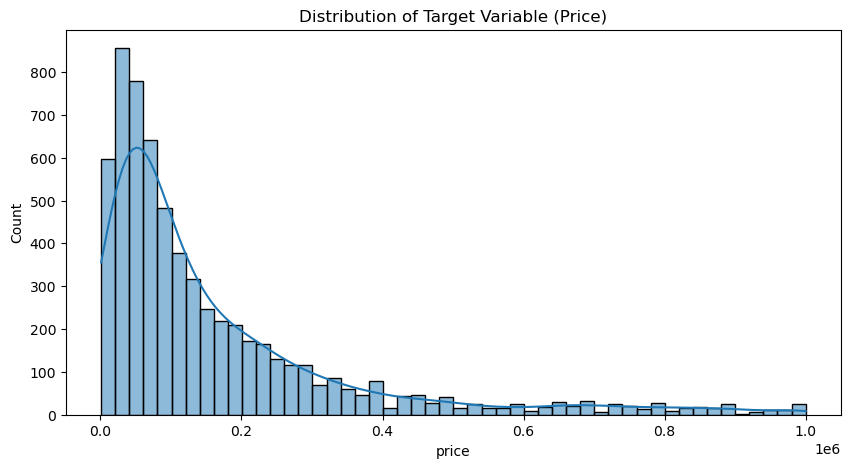

In [76]:
# plot the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(y_train, bins=50, kde=True)
plt.title('Distribution of Target Variable (Price)')

The distribution of price is very right-skewed, hence we should normilize the terget column before computing the correlation 

In [ ]:
import scipy.stats as stats

# one-hot encode the categorical features
transformers_cat = []

# add one-hot encoders with custom max_categories
for col, max_cat in max_categ.items():
    encoder = OneHotEncoder(handle_unknown='infrequent_if_exist',
                            max_categories=max_cat,
                            sparse_output=False) #?


    transformers_cat.append((
        f"ohe_{col}",
        encoder,
        [col]
    ))

# add one-hot encoders for the rest of the categorical features
for col in train_categ.columns:
    if col not in max_categ:
        encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        transformers_cat.append((
            f"ohe_{col}",
            encoder,
            [col]
        ))

transformers_cat.append((
    "normilize",
    Normalizer(),
    ['price']
))

# combine all in ColumnTransformer
ct_cat = ColumnTransformer(transformers_cat)

In [81]:
# data set with categorical and target columns
X_train_cat = X_train.select_dtypes(include='object').join(y_train)

# fit the ColumnTransformer
ct_cat.fit(X_train_cat)

# transform the data and convert to DataFrame
X_train_cat_transformed = ct_cat.transform(X_train_cat)

X_train_cat_transformed

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

### Plot categories aginst average prices  

In [34]:
# add the price column to X_train
train = X_train.select_dtypes(include='object').join(y_train)

# select the columns with less than 5 categories
mono_categ = X_train.columns[X_train.nunique() < 20]

# save unique values for each column in a dictionary
cat_dict = {}
for cat in mono_categ:
    cat_dict[cat] = pd.DataFrame(train[cat].unique())
    cat_dict[cat].columns = [cat]

    # add the column with the mean price for each category
    cat_dict[cat]['mean_price'] = train.groupby(cat)['price'].mean().reset_index(drop=True)

cat_dict

{'body_type':                body_type     mean_price
 0              Crossover  252899.584906
 1              Hatchback   71529.942308
 2                  Sedan  170938.808989
 3                    SUV   75215.718213
 4             Sports Car  174867.450000
 5                  Coupe  160998.614379
 6                    Van  175146.353466
 7          Pick Up Truck  121935.763098
 8   Hard Top Convertible  296832.228571
 9   Soft Top Convertible  195054.452555
 10                 Other  230428.571429
 11         Utility Truck  189640.816901
 12                 Wagon  137350.967742,
 'fuel_type':   fuel_type     mean_price
 0    Petrol  177314.274725
 1    Hybrid  281533.360825
 2    Diesel  205007.351064
 3  Electric  162051.431247,
 'transmission_type':         transmission_type     mean_price
 0  Automatic Transmission  164785.273285
 1     Manual Transmission  162513.333333,
 'engine_capacity_cc':    engine_capacity_cc     mean_price
 0      3000 - 3499 cc  106757.206897
 1          

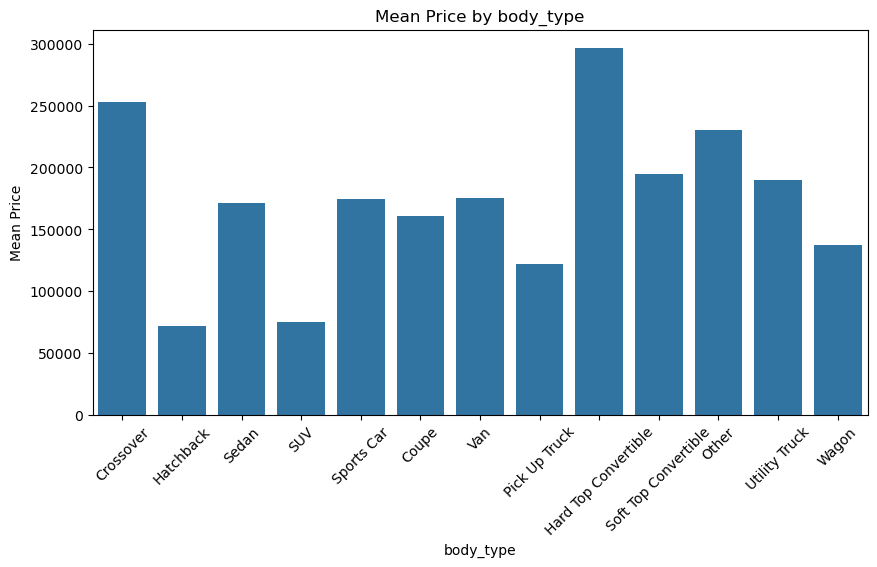

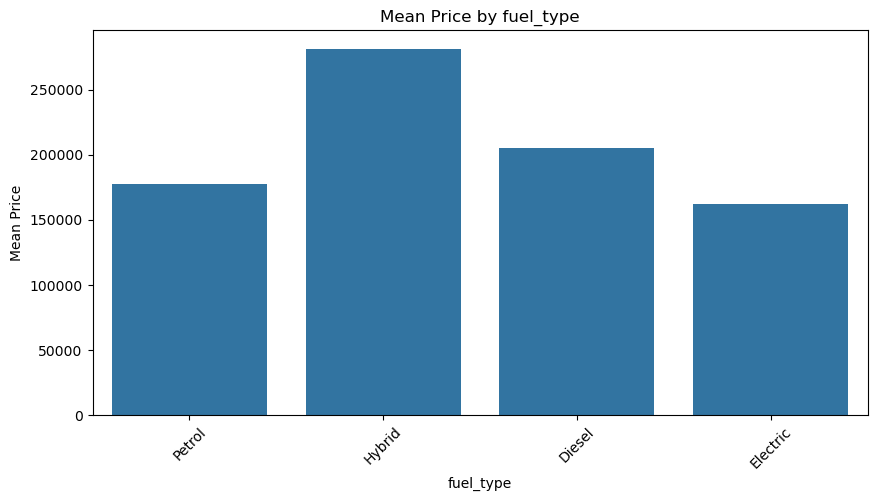

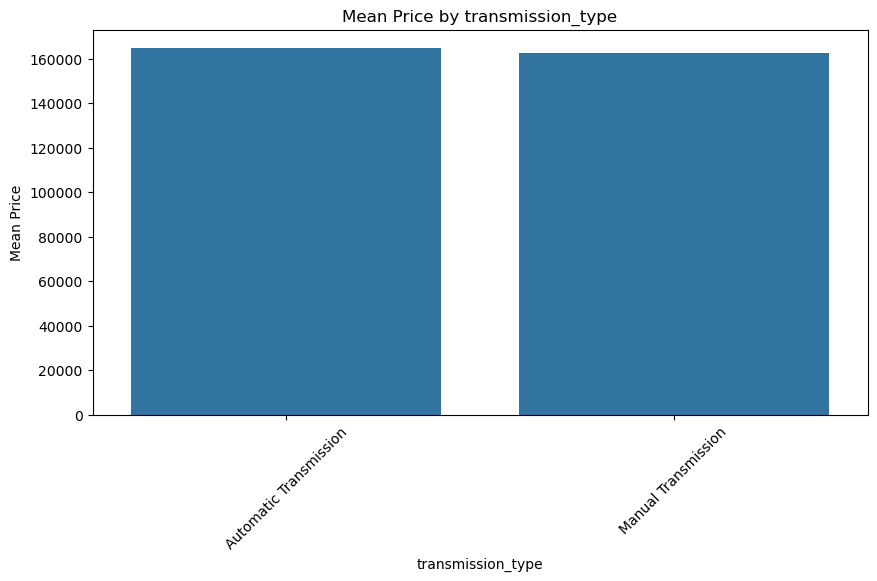

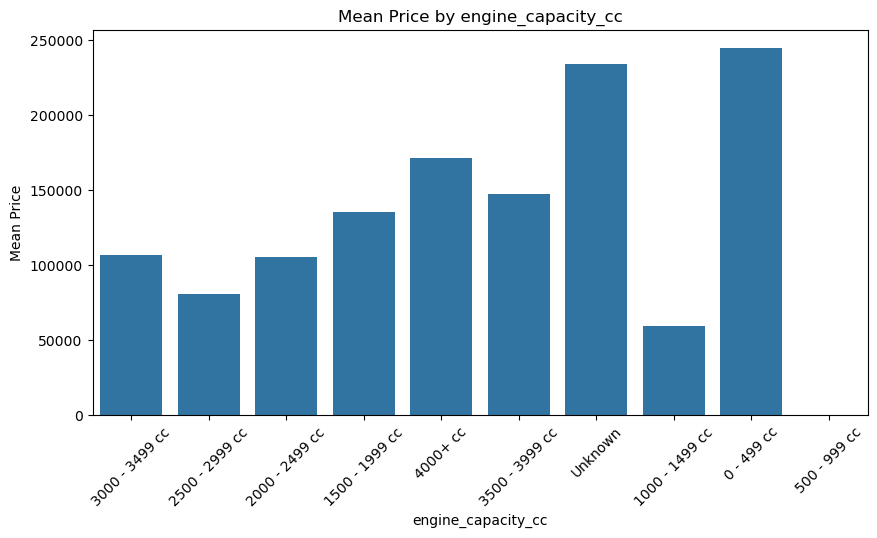

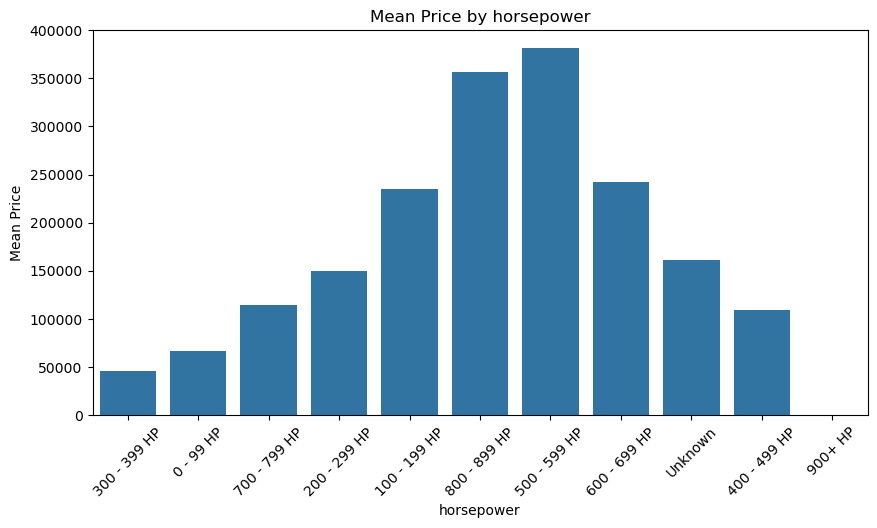

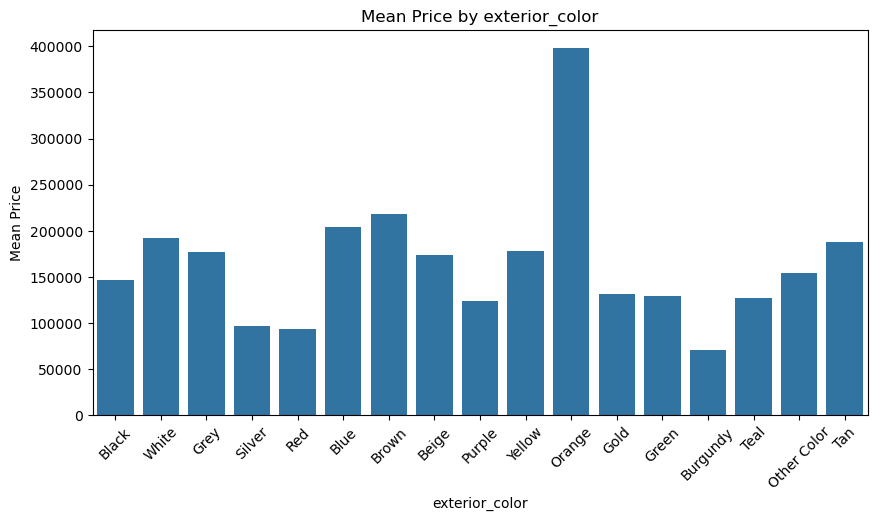

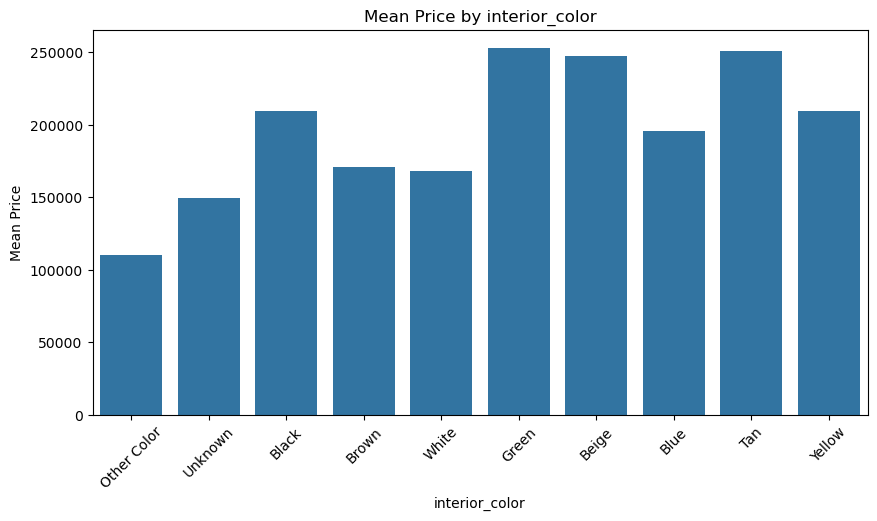

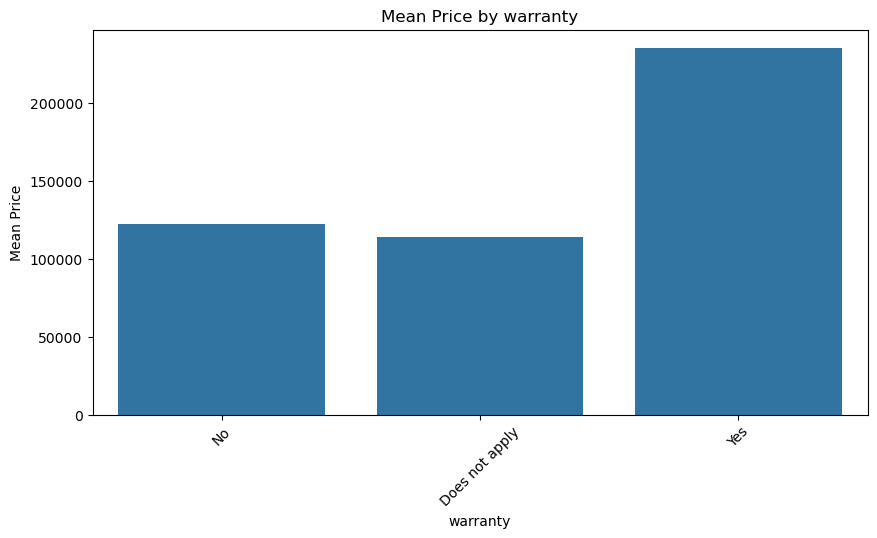

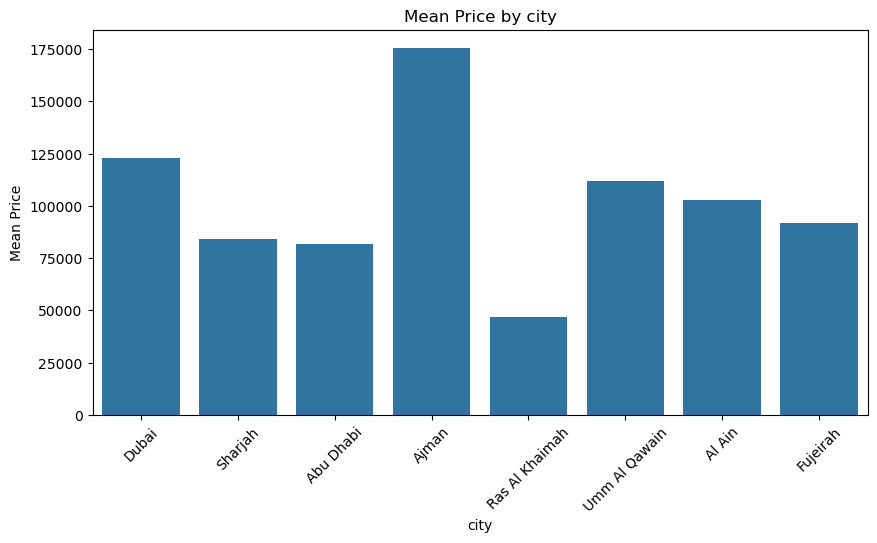

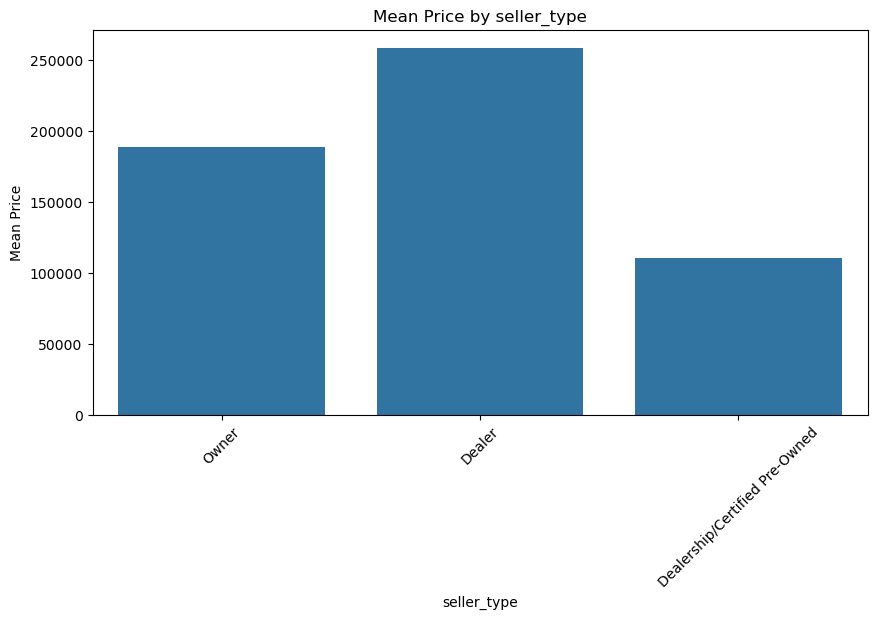

In [35]:

# compute mean prices for ecah category of the selected columns

for cat, df in cat_dict.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df[cat], y=df['mean_price'])
    plt.title(f'Mean Price by {cat}')
    plt.xlabel(cat)
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)
    plt.show()

# Pipeline for Elina's code

# the final pipeline overview

from sklearn.pipeline import Pipeline, FeatureUnion

full_pipeline = Pipeline([
    ('preprocess', preprocessor),           # preprocess the initial feaures 
    ('feature_eng', FeatureUnion([          # engineered features (new transformer)
        ('engineered', final_preprocessor)
    ])),
    ('lin_reg', LinearRegression())
])


In [42]:
from sklearn.preprocessing import FunctionTransformer

def select_num_columns(df):
    return df.select_dtypes(include=np.number).columns.tolist()

def select_cat_columns(df):
    return df.select_dtypes(include="object").columns.tolist()

Build a preprocessor, which for:
1. numeric columns:
    - deals with missing values
    - scales
2. categorical columns:
    - encodes ignoring NaN

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [76]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy="mean"), select_num_columns(X_train)),
        ('cat', OneHotEncoder(handle_unknown='ignore'), select_cat_columns(X_train))
    ]
)

In [126]:
# feature engineering
from sklearn.preprocessing import FunctionTransformer

# 1. Add categorical combinations
# This function creates new features by combining 'brand' and 'trim', and 'model' and 'trim'.

# helper function to filter out the least common categories
# def filter_categ(df):
    
#     for col in ['brand', 'model', 'trim']:
#         unique = df[col].value_counts().reset_index()
#         unique['cumulative_sum'] = unique['count'].cumsum()
#         # unite categories that contribute less than 3% under 'other'
#         threshold = unique[unique['cumulative_sum'] / unique['cumulative_sum'].iloc[-1] > 0.97].iloc[:, 0].count()
#         df[col] = df[col].where(df[col].isin(unique['index'][:threshold]), 'Other')
        

def add_cat_combos(df):
    df = df.copy()

    for col in ['brand', 'model', 'trim']:
        df[col] = df[col].replace('Other', np.nan)

    df['brand_trim'] = df['brand'].astype(str) + '_' + df['trim'].astype(str)
    df['model_trim'] = df['model'].astype(str) + '_' + df['trim'].astype(str)
    return df

cat_combos = FunctionTransformer(add_cat_combos, validate=False)



# 2. Pairwise numeric interactions
# This function creates new features by multiplying and dividing pairs of numeric columns.
def add_numeric_interactions(df):
    df = df.copy()
    pairs = [('1','2'), ('2','4'), ('1','4'), ('0','3')]

    for a, b in pairs:
        a_f, b_f = df[a].astype(float), df[b].astype(float)
        a_ft, b_ft = df[a].astype(float), df[b].astype(float)

        df[f'{a}_x_{b}'] = a_f * b_f
        df[f'{a}_x_{b}'] = a_ft * b_ft

        df[f'{a}_over_{b}'] = a_f / (b_f + 1e-6)
        df[f'{a}_over_{b}'] = a_ft / (b_ft + 1e-6)

        df[f'{a}_recipprod_{b}'] = 1.0 / (a_f * b_f + 1e-6)
        df[f'{a}_recipprod_{b}'] = 1.0 / (a_ft * b_ft + 1e-6)

    return df

numeric_interactions = FunctionTransformer(add_numeric_interactions, validate=False)



# 3. Simple polynomial terms
# This function adds squared terms for the first 5 numeric columns.
def add_simple_polynomial_terms(df):
    df = df.copy()

    for i in range(5):
        df[f'{i}_sq'] = df[f'{i}'].astype(float) ** 2

    return df

simple_polynomial_terms = FunctionTransformer(add_simple_polynomial_terms, validate=False)



# 4. Count-based aggregate features
# This function adds count features for 'brand' and 'model', counting occurrences in the dataset.
def add_count_features(df):
    df = df.copy()

    for cat in ['brand', 'model']:
        counts = df[cat].value_counts()
        df[f'{cat}_count'] = df[cat].map(counts)

    return df

count_features = FunctionTransformer(add_count_features, validate=False)

# Combine all feature engineering steps into a single pipeline

feature_engineering = Pipeline([
    ("cat_combos", cat_combos),
    ("numeric_interactions", numeric_interactions),
    ("simple_polynomial_terms", simple_polynomial_terms),
    ("count_features", count_features)
])

In [ ]:
# Preprocessing pipeline for numerical and categorical features

num_transformer = Pipeline([
   ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler())
])



cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy='constant', fill_value='missing')),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])


num_cols = select_num_columns(X_train) + ["1_x_2", "2_x_4", "1_x_4", "0_x_3",
                                          "1_over_2", "2_over_4", "1_over_4", "0_over_3",
                                          "1_recipprod_2", "2_recipprod_4", "1_recipprod_4", "0_recipprod_3",
                                          "0_sq", "1_sq", "2_sq", "3_sq", "4_sq", 'brand_count', 'model_count']

cat_cols = select_cat_columns(X_train) + ['brand_trim', 'model_trim']



transformer = ColumnTransformer([
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols),
])

In [128]:
# final pipeline 
from sklearn.linear_model import LinearRegression



pipeline = Pipeline([
    ("feature_engineering", feature_engineering),
    ("transformer", transformer),
    ("model", LinearRegression())
])

## Fit the model using cross validation 

In [129]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import FunctionTransformer

cv = cross_validate(pipeline, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

print("Cross-validation results:")
print("Train R^2 scores:", cv['train_score'])
print("Test R^2 scores:", cv['test_score']) 

KeyboardInterrupt: 

# Elina's code

In [ ]:
# 1 initial preprocessor

num_pipeline = Pipeline([
    ("iforest", IsolationForest(random_state=42)),  # detect outliers
    ("drop_outliers", FunctionTransformer(lambda x: x[~x['outliers']])),  # drop outliers
    ("imputer", IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)),   # fill in NaN
    ("scaler",  StandardScaler()),
])

# 2) Categorical sub-pipeline: constant impute, then one-hot
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")),
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, X_train_split.select_dtypes(include=np.number).columns.tolist()),
    ("cat", cat_pipeline, X_train_split.select_dtypes(include='object').columns.tolist())
])


In [93]:
# 1) Numeric sub-pipeline: 
# 1.1 detect outliers with isolation Forest
# 1.2 drop outliers
# 1.3 fill in NaN eith an IterativeImputer
# 1.4 standardize the data
 
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression

num_pipeline = Pipeline([
    ("iforest", IsolationForest(random_state=42)),  # detect outliers
    ("drop_outliers", FunctionTransformer(lambda x: x[~x['outliers']])),  # drop outliers
    ("imputer", IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)),   # fill in NaN
    ("scaler",  StandardScaler()),
])

# 2) Categorical sub-pipeline: constant impute, then one-hot
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__missing__")),
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, X_train_split.select_dtypes(include=np.number).columns.tolist()),
    ("cat", cat_pipeline, X_train_split.select_dtypes(include='object').columns.tolist())
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train_split, y_train_split)
y_train_pred = model.predict(X_train_split, y_train_split)


NameError: name 'IterativeImputer' is not defined

In [3]:
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# apply changes to the train set

# --- 1. Combo categorical features ---
# helper function that filters the least common categories


def add_cat_combos(df):
    df = df.copy()
    df['brand_trim'] = df['brand'].astype(str) + '_' + df['trim'].astype(str)
    df['model_trim'] = df['model'].astype(str) + '_' + df['trim'].astype(str)
    return df

Xtr_fe = add_cat_combos(X_train_split)
Xte_fe = add_cat_combos(X_val_split)

Xtr_fe

0         1          2         3         4          brand  \
5479  1.034649  3.535440  22.901885  0.375429 -5.742028         Nissan   
4594  1.620067  3.614061  18.926776  0.370955 -0.268432  Mercedes-Benz   
4199  1.996525  3.716256        NaN  0.698422  1.184589     Land Rover   
6717  1.104337  3.719251  13.319119  0.762578  3.146158     Land Rover   
3863  0.658737  3.622074  16.892714  0.626038  1.434318  Mercedes-Benz   
...        ...       ...        ...       ...       ...            ...   
2564  0.399430  3.728764  -6.640363  0.256961 -0.676138         Toyota   
3448  0.992648  3.771755  11.760375  0.260140  4.443791       Cadillac   
1976  0.804309  3.709307  13.895089  0.349300  4.074094      Chevrolet   
716   0.424525  3.742567   4.843790  0.334751       NaN            Kia   
6679  0.440184  3.558288  20.812487  0.343964 -0.459756         Nissan   

                  model            trim      body_type fuel_type  \
5479             Sentra              SR          Sedan    Petrol   
4594                GLC  GLC 250 4MATIC            SUV    Petrol   
4199        Range Rover    Supercharged            SUV    Petrol   
6717  Range Rover Sport    Supercharged            SUV    Petrol   
3863            A-Class           A 250      Hatchback    Petrol   
...                 ...             ...            ...       ...   
2564       Land Cruiser           Other  Pick Up Truck    Diesel   
3448           Escalade    ESV Platinum            SUV    Petrol   
1976           Traverse         LS Base            SUV    Petrol   
716           Telluride           Other            SUV    Petrol   
6679              Rogue        Standard            SUV    Petrol   

           transmission_type engine_capacity_cc    horsepower exterior_color  \
5479  Automatic Transmission            Unknown       Unknown           Grey   
4594  Automatic Transmission     2000 - 2499 cc  200 - 299 HP          Brown   
4199  Automatic Transmission           4000+ cc  500 - 599 HP           Grey   
6717  Automatic Transmission     3000 - 3499 cc  400 - 499 HP          White   
3863  Automatic Transmission     2000 - 2499 cc  200 - 299 HP          Black   
...                      ...                ...           ...            ...   
2564     Manual Transmission           4000+ cc           NaN          White   
3448  Automatic Transmission           4000+ cc  400 - 499 HP          Black   
1976  Automatic Transmission     3500 - 3999 cc  200 - 299 HP           Blue   
716   Automatic Transmission     3500 - 3999 cc       Unknown            Red   
6679  Automatic Transmission     2000 - 2499 cc  200 - 299 HP          White   

     interior_color        warranty     city seller_type  \
5479        Unknown              No    Dubai       Owner   
4594          Beige              No    Dubai      Dealer   
4199          Beige              No    Dubai       Owner   
6717          Brown  Does not apply    Dubai       Owner   
3863          Black              No    Dubai       Owner   
...             ...             ...      ...         ...   
2564        Unknown  Does not apply    Dubai      Dealer   
3448          Brown              No    Dubai       Owner   
1976          Beige              No    Dubai      Dealer   
716           Black              No    Dubai       Owner   
6679          Black             Yes  Sharjah      Dealer   

                        brand_trim                      model_trim  
5479                     Nissan_SR                       Sentra_SR  
4594  Mercedes-Benz_GLC 250 4MATIC              GLC_GLC 250 4MATIC  
4199       Land Rover_Supercharged        Range Rover_Supercharged  
6717       Land Rover_Supercharged  Range Rover Sport_Supercharged  
3863           Mercedes-Benz_A 250                   A-Class_A 250  
...                            ...                             ...  
2564                  Toyota_Other              Land Cruiser_Other  
3448         Cadillac_ESV Platinum           Escalade_ESV Platinum  
1976

In [5]:

# --- 2. Pairwise numeric interactions ---
pairs = [('1','2'), ('2','4'), ('1','4'), ('0','3')]
for a, b in pairs:
    a_f, b_f = Xtr_fe[a].astype(float), Xtr_fe[b].astype(float)
    a_ft, b_ft = Xte_fe[a].astype(float), Xte_fe[b].astype(float)

    Xtr_fe[f'{a}_x_{b}'] = a_f * b_f
    Xte_fe[f'{a}_x_{b}'] = a_ft * b_ft

    Xtr_fe[f'{a}_over_{b}'] = a_f / (b_f + 1e-6)
    Xte_fe[f'{a}_over_{b}'] = a_ft / (b_ft + 1e-6)

    Xtr_fe[f'{a}_recipprod_{b}'] = 1.0 / (a_f * b_f + 1e-6)
    Xte_fe[f'{a}_recipprod_{b}'] = 1.0 / (a_ft * b_ft + 1e-6)

# --- 3. Simple polynomial terms ---
Xtr_fe['0_sq'] = Xtr_fe['0'].astype(float) ** 2
Xte_fe['0_sq'] = Xte_fe['0'].astype(float) ** 2
Xtr_fe['3_sq'] = Xtr_fe['3'].astype(float) ** 2
Xte_fe['3_sq'] = Xte_fe['3'].astype(float) ** 2

# NOT WORKING ???? i omited this step in the pipeline
# --- 4. Midpoint horsepower parser & price_per_hp ---
def parse_hp(value):
    try:
        if isinstance(value, str) and '-' in value:
            low, high = value.split('-')
            return (float(low.strip()) + float(high.strip())) / 2
        elif isinstance(value, (int, float)):
            return value
        else:
            return np.nan
    except:
        return np.nan

Xtr_fe['horsepower_clean'] = Xtr_fe['horsepower'].apply(parse_hp)
Xte_fe['horsepower_clean'] = Xte_fe['horsepower'].apply(parse_hp)

Xtr_fe['horsepower_clean']

5479   NaN
4594   NaN
4199   NaN
6717   NaN
3863   NaN
        ..
2564   NaN
3448   NaN
1976   NaN
716    NaN
6679   NaN
Name: horsepower_clean, Length: 5095, dtype: float64

In [ ]:

# Fill missing with train mean
hp_mean = Xtr_fe['horsepower_clean'].mean()
Xtr_fe['horsepower_clean'].fillna(hp_mean, inplace=True)
Xte_fe['horsepower_clean'].fillna(hp_mean, inplace=True)

Xtr_fe['price_per_hp'] = y_train / (Xtr_fe['horsepower_clean'] + 1e-6)
Xte_fe['price_per_hp'] = y_test  / (Xte_fe['horsepower_clean'] + 1e-6)

# --- 5. Count-based aggregate features ---
brand_counts = Xtr_fe['brand'].value_counts()
model_counts = Xtr_fe['model'].value_counts()

Xtr_fe['brand_freq'] = Xtr_fe['brand'].map(brand_counts)
Xte_fe['brand_freq'] = Xte_fe['brand'].map(brand_counts)  # NOTE: use training counts!

# --- 6. (Optional) Rank/rolling features if time indexed
# e.g., Xtr_fe['price_rank_in_brand'] = Xtr_fe.groupby('brand')['price'].rank()

# --- 7. Update feature lists ---
new_cats = X_train_split.select_dtypes(include="object").columns.tolist() + ['brand_trim', 'model_trim']
new_nums = X_train_split.select_dtypes(include=np.number).columns.tolist() + \
    [f'{a}_x_{b}' for a,b in pairs] + \
    [f'{a}_over_{b}' for a,b in pairs] + \
    [f'{a}_recipprod_{b}' for a,b in pairs] + \
    ['0_sq', '3_sq', 'price_per_hp', 'brand_freq']


In [ ]:

# --- 8. Build new pipeline and train ---
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), new_nums),
        ('cat', OneHotEncoder(handle_unknown='ignore'), new_cats)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(Xtr_fe, y_train)
y_pred = model.predict(Xte_fe)


In [ ]:

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


 # 4.7 Evaluate performance

def evaluate_model(pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)
    mse   = mean_squared_error(y_test, y_pred)
    rmse  = np.sqrt(mse)
    mae   = mean_absolute_error(y_test, y_pred)
    r2    = r2_score(y_test, y_pred)

    print(f"MAE  : {mae:,.2f}")
    print(f"MSE  : {mse:.3f}")
    print(f"RMSE : {rmse:,.2f}")
    print(f"R²   : {r2:.3f}")

#evaluate_model(model, Xte_fe, y_test)

# Build a pipeline from scratch step by step 

## Baseline model

In [100]:
num_processor = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_processor = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
        ('num', num_processor, select_num_columns(X_train)),
        ('cat', cat_processor, select_cat_columns(X_train))
    ])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

cv = cross_validate(pipeline, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

print("Cross-validation results:")
print("Train R^2 scores:", cv['train_score'])
print("Test R^2 scores:", cv['test_score']) 

Cross-validation results:
Train R^2 scores: [0.6528719  0.6597142  0.65714568 0.66187927 0.66109304]
Test R^2 scores: [0.49300481 0.49130671 0.48719121 0.48555077 0.50481921]


In [98]:
# dataframe with the results
results_df = pd.DataFrame({
    'r2_mean_train': [],
    'r2_mean_test': [],
    'r2_std_train': [],
    'r2_std_test': []
})

# define a function that will add a row to the results_df with new results
def update_result(cv):
    global results_df

    results_df.loc[len(results_df)] = [
        cv['train_score'].mean(),
        cv['test_score'].mean(),
        cv['train_score'].std(),
        cv['test_score'].std()
    ]

    return results_df


In [101]:
results_df = results_df.head(0)
update_result(cv)

r2_mean_train  r2_mean_test  r2_std_train  r2_std_test
0       0.658541      0.492375      0.003259      0.00678

## Detect outliers with Isolation Forest

### Buggy version
The issue is that this version violates the imoportant rule of sklearn: 
    all transformers in a Pipeline and ColumnTransformer must preserve the number of rows

In [88]:
from sklearn.ensemble import IsolationForest

def iforest_func(X): 
    num_train = X.select_dtypes(include=np.number)

    # Temporarily impute missing values in numerical features before applying Isolation Forest
    num_temp = SimpleImputer(strategy='median').fit_transform(num_train)  # median is robust to outliers

    num_train['outliers'] = IsolationForest(random_state=42).fit_predict(num_temp) == -1

   # drop outliers from the training set
    num_train = num_train[~num_train['outliers']]

    # drop the outliers column
    return num_train.drop(columns=['outliers'])


iforest = FunctionTransformer(
    iforest_func,
    validate=False
)

num_processor = Pipeline([
    ("iforest", iforest),  # detect outliers
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
        ('num', num_processor, select_num_columns(X_train)),
        ('cat', cat_processor, select_cat_columns(X_train))
    ])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

cv = cross_validate(pipeline, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

print("Cross-validation results:")
print("Train R^2 scores:", cv['train_score'])
print("Test R^2 scores:", cv['test_score']) 

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 944, in fit_transform
    return self._hstack(list(Xs), n_samples=n_samples)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 1058, in _hstack
    return sparse.hstack(converted_Xs).tocsr()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\scipy\sparse\_construct.py", line 756, in hstack
    return _block([blocks], format, dtype, return_spmatrix=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\scipy\sparse\_construct.py", line 971, in _block
    raise ValueError(msg)
ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 5095, expected 4626.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 944, in fit_transform
    return self._hstack(list(Xs), n_samples=n_samples)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 1058, in _hstack
    return sparse.hstack(converted_Xs).tocsr()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\scipy\sparse\_construct.py", line 756, in hstack
    return _block([blocks], format, dtype, return_spmatrix=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\scipy\sparse\_construct.py", line 971, in _block
    raise ValueError(msg)
ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 5095, expected 4635.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 944, in fit_transform
    return self._hstack(list(Xs), n_samples=n_samples)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 1058, in _hstack
    return sparse.hstack(converted_Xs).tocsr()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\scipy\sparse\_construct.py", line 756, in hstack
    return _block([blocks], format, dtype, return_spmatrix=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\scipy\sparse\_construct.py", line 971, in _block
    raise ValueError(msg)
ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 5095, expected 4640.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 944, in fit_transform
    return self._hstack(list(Xs), n_samples=n_samples)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 1058, in _hstack
    return sparse.hstack(converted_Xs).tocsr()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\scipy\sparse\_construct.py", line 756, in hstack
    return _block([blocks], format, dtype, return_spmatrix=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\scipy\sparse\_construct.py", line 971, in _block
    raise ValueError(msg)
ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 5095, expected 4643.

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 944, in fit_transform
    return self._hstack(list(Xs), n_samples=n_samples)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\compose\_column_transformer.py", line 1058, in _hstack
    return sparse.hstack(converted_Xs).tocsr()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\scipy\sparse\_construct.py", line 756, in hstack
    return _block([blocks], format, dtype, return_spmatrix=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\scipy\sparse\_construct.py", line 971, in _block
    raise ValueError(msg)
ValueError: blocks[0,:] has incompatible row dimensions. Got blocks[0,1].shape[0] == 5096, expected 4576.


### Clean version
#### Set outliers to NaN

In [102]:
from sklearn.ensemble import IsolationForest

def iforest_func(X): 
    num_train = X.select_dtypes(include=np.number)

    # Temporarily impute missing values in numerical features before applying Isolation Forest
    num_temp = SimpleImputer(strategy='median').fit_transform(num_train)  # median is robust to outliers

    num_train['outliers'] = IsolationForest(random_state=42).fit_predict(num_temp) == -1

   # set the outliers to NaN
    num_train.loc[num_train['outliers'], :] = np.nan

    # drop the outliers column
    return num_train.drop(columns=['outliers'])


iforest = FunctionTransformer(
    iforest_func,
    validate=False
)

num_processor = Pipeline([
    ("iforest", iforest),  # detect outliers
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
        ('num', num_processor, select_num_columns(X_train)),
        ('cat', cat_processor, select_cat_columns(X_train))
    ])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

cv = cross_validate(pipeline, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

print("Cross-validation results:")
print("Train R^2 scores:", cv['train_score'])
print("Test R^2 scores:", cv['test_score']) 

C:\Users\dir\AppData\Local\Temp\ipykernel_20132\2729509221.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  num_train.loc[num_train['outliers'], :] = np.nan
C:\Users\dir\AppData\Local\Temp\ipykernel_20132\2729509221.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  num_train.loc[num_train['outliers'], :] = np.nan
C:\Users\dir\AppData\Local\Temp\ipykernel_20132\2729509221.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  num_train.loc[num_train['outliers'], :

Cross-validation results:
Train R^2 scores: [0.66733497 0.67469692 0.67091371 0.67696587 0.67561404]
Test R^2 scores: [0.51651607 0.50734882 0.51380647 0.50609148 0.52441071]


In [103]:
update_result(cv)

r2_mean_train  r2_mean_test  r2_std_train  r2_std_test
0       0.658541      0.492375      0.003259     0.006780
1       0.673105      0.513635      0.003517     0.006646

# Fill in NaN

In [109]:
from sklearn.experimental import enable_iterative_imputer  # needed to enable
from sklearn.impute import IterativeImputer # for the actual model
from sklearn.linear_model import BayesianRidge

num_processor = Pipeline([
    ("iforest", iforest),  # detect outliers
    ("imputer", IterativeImputer(estimator=RandomForestRegressor(n_estimators=10), max_iter=10, random_state=0)),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
        ('num', num_processor, select_num_columns(X_train)),
        ('cat', cat_processor, select_cat_columns(X_train))
    ])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

cv = cross_validate(pipeline, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

print("Cross-validation results:")
print("Train R^2 scores:", cv['train_score'])
print("Test R^2 scores:", cv['test_score']) 

C:\Users\dir\AppData\Local\Temp\ipykernel_20132\2729509221.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  num_train.loc[num_train['outliers'], :] = np.nan
c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\dir\AppData\Local\Temp\ipykernel_20132\2729509221.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  num_train.loc[num_train['outliers'], :] = np.nan
C:\Users\dir\AppData\Local\Temp\ipykernel_20132\2729509221.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and 

Cross-validation results:
Train R^2 scores: [0.66708652 0.67621981 0.67038403 0.67786607 0.67609654]
Test R^2 scores: [0.51676226 0.51007893 0.51904059 0.50293965 0.53405286]


In [110]:
update_result(cv)

r2_mean_train  r2_mean_test  r2_std_train  r2_std_test
0       0.658541      0.492375      0.003259     0.006780
1       0.673105      0.513635      0.003517     0.006646
2       0.672661      0.513705      0.003528     0.006816
3       0.673531      0.516575      0.004100     0.010390

In [115]:
results_df = results_df.drop(index=2)

In [116]:
results_df.reset_index(drop=True, inplace=True)

In [117]:
results_df

r2_mean_train  r2_mean_test  r2_std_train  r2_std_test
0       0.658541      0.492375      0.003259     0.006780
1       0.673105      0.513635      0.003517     0.006646
2       0.673531      0.516575      0.004100     0.010390

# Unite rare categories in OneHotEncoding

In [119]:
train_categ = X_train.select_dtypes(include='object').reset_index(drop=True)

diverce_categ = train_categ.columns[train_categ.nunique() > 20]

# dictionary with the threshold for OneHotEncoder
max_categ = {}


for col in diverce_categ:

    unique = train_categ[col].value_counts().reset_index()

    unique['cumulative_sum'] = unique['count'].cumsum()
    unique['cumulative_percentage'] = unique['cumulative_sum'] / unique['cumulative_sum'].iloc[-1]

    # threshold to filter the least common features which contribute up to 5% in total
    threshold = unique[unique['cumulative_percentage'] > 0.95].iloc[:, 0].count()

    # save the frequent features to dict
    max_categ[col] = threshold

            brand  count  cumulative_sum  cumulative_percentage
0   Mercedes-Benz    973             973               0.152771
1             BMW    564            1537               0.241325
2          Nissan    463            2000               0.314021
3      Land Rover    437            2437               0.382635
4          Toyota    430            2867               0.450149
..            ...    ...             ...                    ...
80      King Long      1            6365               0.999372
81      SsangYong      1            6366               0.999529
82          Avatr      1            6367               0.999686
83          Exeed      1            6368               0.999843
84         Pagani      1            6369               1.000000

[85 rows x 4 columns]
                 model  count  cumulative_sum  cumulative_percentage
0          Range Rover    179             179               0.028105
1              S-Class    145             324               0.050871
2 

In [125]:
list(max_categ.keys())

['brand', 'model', 'trim']

In [132]:
ohe_diverse = []

for col, max_cat in max_categ.items():
    encoder = OneHotEncoder(handle_unknown='infrequent_if_exist',
                            max_categories=max_cat,
                            sparse_output=False) #?


    ohe_diverse.append((
        f"ohe_{col}",
        encoder,
        [col]
    ))

encoder = ColumnTransformer(ohe_diverse + [
    ("ohe_other", OneHotEncoder(handle_unknown='ignore', sparse_output=False), X_train.select_dtypes(include='object').columns.difference(list(max_categ.keys())).tolist())
])

def restore_df(X, columns):
    return pd.DataFrame(X, columns=columns)

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant", fill_value="missing")), # returns np.array, so we need to convert it to df to OneHotEncode it
    ('to_df', FunctionTransformer(lambda X: pd.DataFrame(X, columns=select_cat_columns(X_train)), validate=False)),
    ('encoder', encoder)
])

preprocessor = ColumnTransformer([
    ('num', num_processor, select_num_columns(X_train)),
    ('cat', cat_pipeline, select_cat_columns(X_train))
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

cv = cross_validate(pipeline, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

print("Cross-validation results:")
print("Train R^2 scores:", cv['train_score'])
print("Test R^2 scores:", cv['test_score']) 

C:\Users\dir\AppData\Local\Temp\ipykernel_20132\2729509221.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  num_train.loc[num_train['outliers'], :] = np.nan
c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\dir\AppData\Local\Temp\ipykernel_20132\2729509221.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  num_train.loc[num_train['outliers'], :] = np.nan
C:\Users\dir\AppData\Local\Temp\ipykernel_20132\2729509221.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and 

Cross-validation results:
Train R^2 scores: [0.56311609 0.57851138 0.56674271 0.5847706  0.58094982]
Test R^2 scores: [-2.60073958e+19  4.92530742e-01 -1.97695160e+19  4.49164610e-01
  4.59839917e-01]


# Achieve the best possible correlation coefficient of numeri columns with the target

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer  # needed to enable
from sklearn.impute import IterativeImputer # for the actual model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest 
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
import numpy as np
import pandas as pd

In [29]:
# separate numeric columns
X_train, X_test, y_train, y_test = splitter(".//topic21_v9_train.csv")

num_X = X_train.select_dtypes(include=np.number)

In [61]:
num_X

0         1          2         3         4  inverse_of_0  \
2864  0.933387  3.736676  13.469804  0.436338       NaN      1.071367   
2722  1.046102  3.577125  20.769281  0.422639 -3.927213      0.955930   
838   1.046956  3.587600   9.776158  0.368441       NaN      0.955150   
14         NaN  3.614859  16.046324  0.190880 -0.684680           NaN   
3870  1.375672  3.594565   6.158044  0.286728 -0.977250      0.726918   
...        ...       ...        ...       ...       ...           ...   
5226  0.587089  3.654790  21.208955       NaN  0.038555      1.703320   
5390       NaN  3.625648  12.157203  0.689505  0.452885           NaN   
860   1.112624  3.720506        NaN  0.665631       NaN      0.898776   
7603       NaN       NaN   9.862214  0.653973  1.611732           NaN   
7270  0.807788  3.620538  11.020759  0.257186  0.655248      1.237948   

         2_log  2_log_norm  
2864  2.600450         1.0  
2722  3.033475         1.0  
838   2.279947         1.0  
14    2.775480         1.0  
3870  1.817759         1.0  
...        ...         ...  
5226  3.054423         1.0  
5390  2.497922         1.0  
860        NaN         1.0  
7603  2.288711         1.0  
7270  2.399781         1.0  

[6369 rows x 8 columns]

In [30]:
# detect outliers and fill in nan

num_X = num_X.iloc[:, :5]

def iforest_func(X): 
    num_train = X.select_dtypes(include=np.number)
    num_temp = SimpleImputer(strategy='median').fit_transform(num_train)
    num_train['outliers'] = IsolationForest(random_state=42, n_jobs=-1, contamination=0.01).fit_predict(num_temp) == -1
    num_train.loc[num_train['outliers'], :] = np.nan
    return num_train.drop(columns=['outliers'])

num_processor = Pipeline([
    ("iforest", FunctionTransformer(iforest_func, validate=False)),
    ("imputer", IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, n_jobs=-1), max_iter=10, random_state=0)),
    ("scaler", StandardScaler())
])

transformed = num_processor.fit_transform(num_X)

num_X_transformed = pd.DataFrame(transformed.tolist(), columns=[f'{i}' for i in range(5)])

C:\Users\dir\AppData\Local\Temp\ipykernel_10596\3778652314.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  num_train.loc[num_train['outliers'], :] = np.nan
c:\Users\dir\anaconda3\envs\ml_project_env\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: >

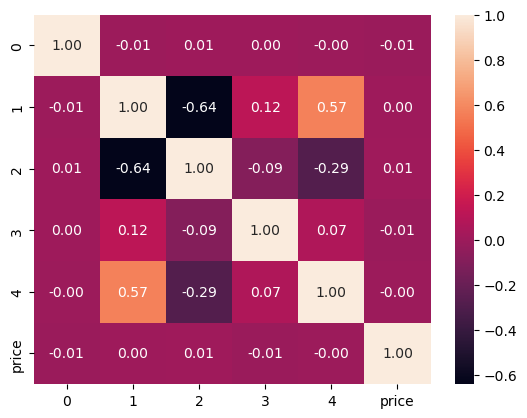

In [31]:
# correlation of the existing columns with the price

import seaborn as sns
import matplotlib.pyplot as plt

num_X_transformed["price"] = y_train

sns.heatmap(num_X_transformed.corr(), annot=True, fmt=".2f")

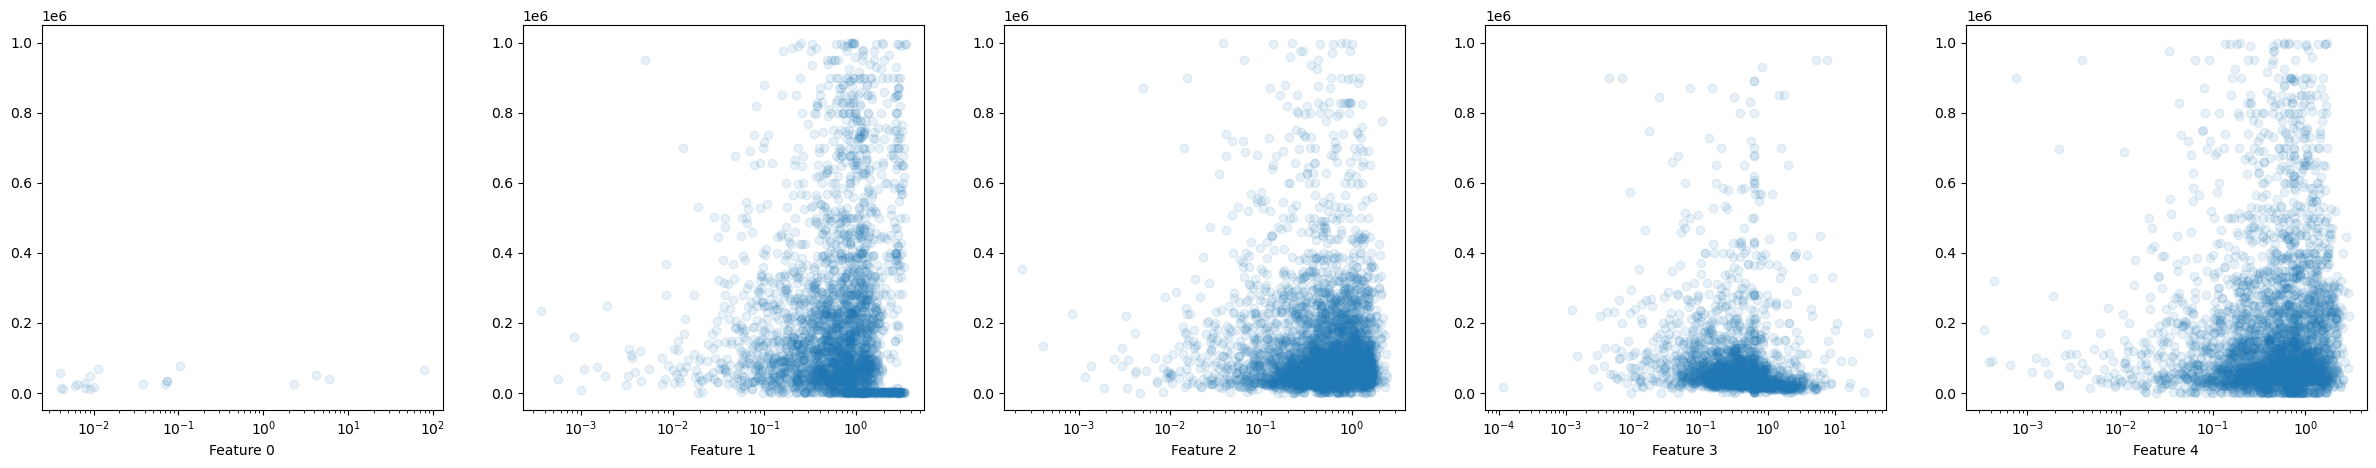

In [32]:
fig, ax = plt.subplots(1, 5, figsize=(30, 5))

for i in range(5):
    ax[i].scatter(x=num_X_transformed[f'{i}'], y=y_train, alpha=0.1)
    ax[i].set_xlabel(f'Feature {i}')
    ax[i].set_xscale('log')

<Axes: >

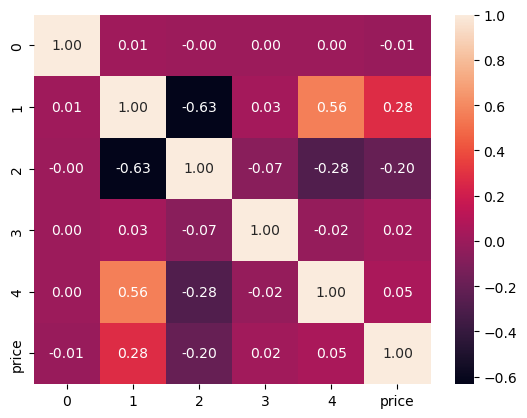

In [35]:
X_train, X_test, y_train, y_test = splitter(".//topic21_v9_train.csv")

num_X = X_train.select_dtypes(include=np.number)

num_X["price"] = y_train

sns.heatmap(num_X.corr(), annot=True, fmt=".2f")

In [41]:
num_processor_ = Pipeline([
    ("imputer", IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, n_jobs=-1), max_iter=10, random_state=0)),
    ("scaler", StandardScaler())
])

transformed_ = num_processor_.fit_transform(X_train.iloc[:, :5])

num_X_transformed_ = pd.DataFrame(transformed_.tolist(), columns=[f'{i}' for i in range(5)])

<Axes: >

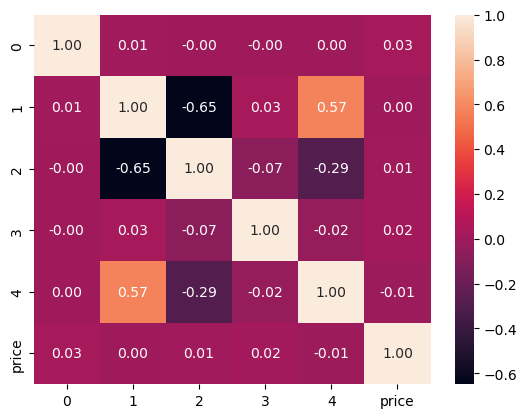

In [42]:
num_X_transformed_["price"] = y_train

sns.heatmap(num_X_transformed_.corr(), annot=True, fmt=".2f")

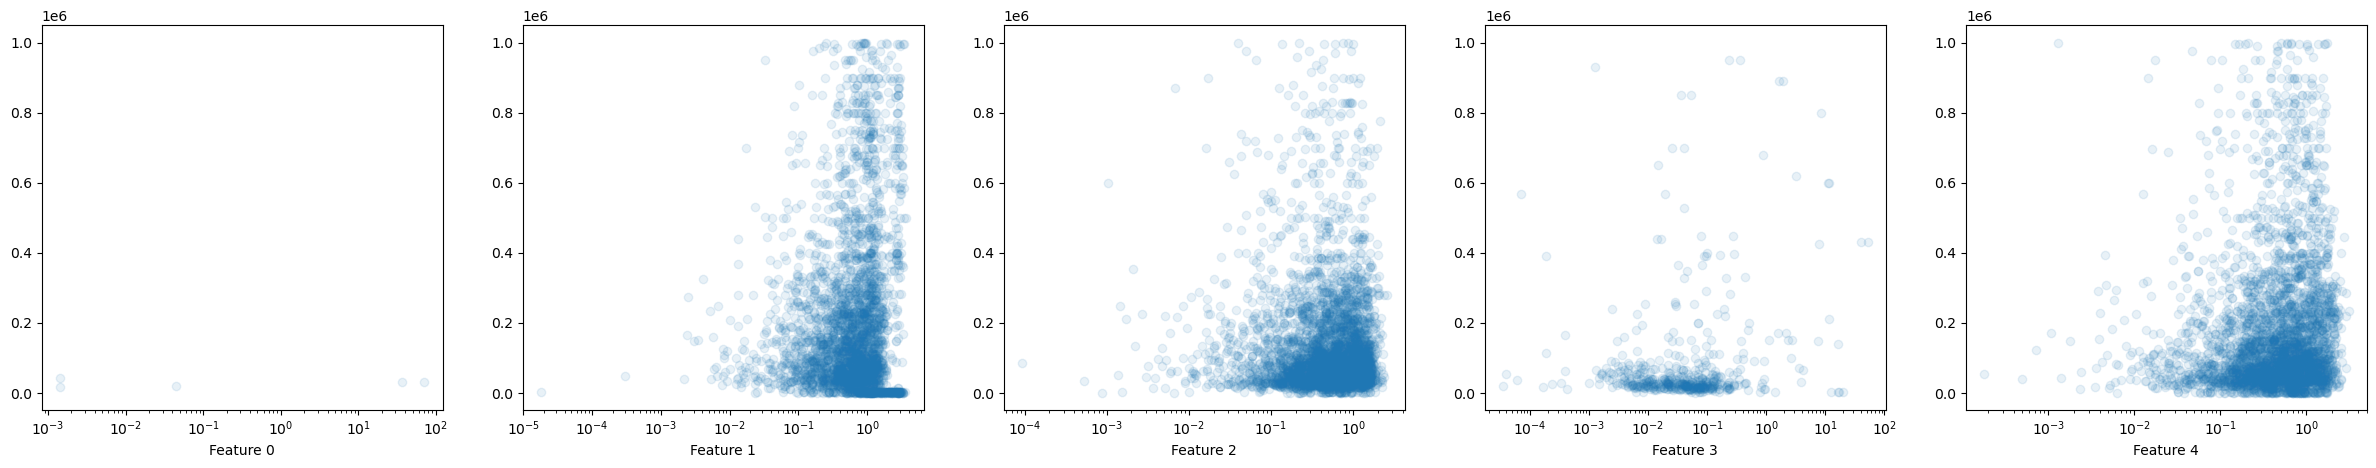

In [43]:
fig, ax = plt.subplots(1, 5, figsize=(30, 5))

for i in range(5):
    ax[i].scatter(x=num_X_transformed[f'{i}'], y=y_train, alpha=0.1)
    ax[i].set_xlabel(f'Feature {i}')
    ax[i].set_xscale('log')